# 1. LIBRERIES

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import chi2_contingency
import warnings
warnings.filterwarnings('ignore')

# 2. FIGURE CONFIGURATIONS

In [2]:
FONT_SIZE_LABELS = 30
FONT_SIZE_TICKS = 28
FONT_SIZE_TITLE = 32
FONT_SIZE_ANNOTATIONS = 24
FONT_SIZE_LEGEND = 24
DPI_SETTING = 100

COLOR_PRIMARY ='#3498DB'
COLOR_SECONDARY = '#E74C3C'
COLOR_TERTIARY = '#2ECC71'
COLOR_QUATERNARY = '#F39C12'
COLOR_PURPLE = '#9B59B6'
COLOR_TEAL = '#1ABC9C'

plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.size'] = FONT_SIZE_TICKS
plt.rcParams['axes.linewidth'] = 1.5
plt.rcParams['figure.dpi'] = DPI_SETTING

def apply_apa_style(ax):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_linewidth(1.5)
    ax.spines['bottom'].set_linewidth(1.5)

# 3. CREATE FOLDER STRUCTURE

In [2]:
folders = [
    'fig/01_exploratory_analysis',
    'fig/01_exploratory_analysis/before_cleaning',
    'fig/01_exploratory_analysis/after_cleaning',
    'fig/01_exploratory_analysis/comparison',
    'fig/01_exploratory_analysis/predictors_analysis',
    'db/01_cleaned_data',
    'db/01_reports'
]

for folder in folders:
    os.makedirs(folder, exist_ok=True)

# 4. DATA LOADING

The data was obtained from the Colombian government website at this link:

https://www.datos.gov.co/Inclusi-n-Social-y-Reconciliaci-n/Victimas-Anualizado-Por-Hecho-Departamental/dyjp-uwwh/about_data

You can download the latest dataset from the link above. For this project, we used the dataset that was updated on November 13, 2025.

Descriptions of the variables can be found at the link above. 

In [3]:
print("\n" + "="*80)
print("1. DATA LOADING")
print("="*80)

df_raw = pd.read_csv('db/Victimas_Anualizado_Por_Hecho_-_Departamental_20251119.csv')
# link_data = r'https://www.datos.gov.co/Inclusi-n-Social-y-Reconciliaci-n/Victimas-Anualizado-Por-Hecho-Departamental/dyjp-uwwh/about_data'

print(f"\n \u2713 Dataset loaded successfully")
print(f"  • Total records: {df_raw.shape[0]:,}")
print(f"  • Total columns: {df_raw.shape[1]}")
print(f"\n \u2713 Columns:")
for col in df_raw.columns:
    print(f"  • {col}")


1. DATA LOADING

 ✓ Dataset loaded successfully
  • Total records: 7,764,319
  • Total columns: 16

 ✓ Columns:
  • FECHA_CORTE
  • NOM_RPT
  • COD_PAIS
  • PAIS
  • COD_ESTADO_DEPTO
  • ESTADO_DEPTO
  • VIGENCIA
  • PARAM_HECHO
  • HECHO
  • SEXO
  • ETNIA
  • DISCAPACIDAD
  • CICLO_VITAL
  • PER_OCU
  • PER_DECLA
  • EVENTOS


# 5. INITIAL ANALYSIS - BEFORE CLEANING

First, we look at the general information in the dataframe (df).

In [4]:
df_raw['EVENTOS'].describe()

count    7.750538e+06
mean     2.917113e+01
std      3.945136e+02
min      0.000000e+00
25%      1.000000e+00
50%      1.000000e+00
75%      4.000000e+00
max      3.519050e+05
Name: EVENTOS, dtype: float64

In [5]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7764319 entries, 0 to 7764318
Data columns (total 16 columns):
 #   Column            Dtype  
---  ------            -----  
 0   FECHA_CORTE       object 
 1   NOM_RPT           object 
 2   COD_PAIS          int64  
 3   PAIS              object 
 4   COD_ESTADO_DEPTO  int64  
 5   ESTADO_DEPTO      object 
 6   VIGENCIA          float64
 7   PARAM_HECHO       int64  
 8   HECHO             object 
 9   SEXO              object 
 10  ETNIA             object 
 11  DISCAPACIDAD      object 
 12  CICLO_VITAL       object 
 13  PER_OCU           float64
 14  PER_DECLA         float64
 15  EVENTOS           float64
dtypes: float64(4), int64(3), object(9)
memory usage: 947.8+ MB


We check for null data in the df.

In [6]:
df_raw.isnull().sum()

FECHA_CORTE               0
NOM_RPT                   0
COD_PAIS                  0
PAIS                      0
COD_ESTADO_DEPTO          0
ESTADO_DEPTO              0
VIGENCIA            1050816
PARAM_HECHO               0
HECHO                     0
SEXO                      0
ETNIA                     0
DISCAPACIDAD              0
CICLO_VITAL               0
PER_OCU               13781
PER_DECLA             14872
EVENTOS               13781
dtype: int64

In [7]:
# Total number of rows
total_rows = len(df_raw)

# Complete duplicate rows
duplicate_mask = df_raw.duplicated(keep=False) # Mark all duplicates
duplicates_df = df_raw[duplicate_mask]

# Number of duplicate rows (only additional repeats)
num_duplicates = df_raw.duplicated().sum()

# Percentage of duplicates
percent_duplicates = (num_duplicates / total_rows) * 100

print(f"Total rows: {total_rows:,}")
print(f"Duplicate rows (extra copies): {num_duplicates:,}")
print(f"Percentage duplicated: {percent_duplicates:.2f}%")

Total rows: 7,764,319
Duplicate rows (extra copies): 346,406
Percentage duplicated: 4.46%


In [8]:
# Group duplicates across all columns
duplicate_groups = df_raw[df_raw.duplicated(keep=False)].sort_values(df_raw.columns.tolist()).head(10)
duplicate_groups

FECHA_CORTE                                            NOM_RPT  \
1078570    30/09/24  REPORTE VICTIMAS ANUALIZADO POR HECHO, CIFRA D...   
1083790    30/09/24  REPORTE VICTIMAS ANUALIZADO POR HECHO, CIFRA D...   
1066076    30/09/24  REPORTE VICTIMAS ANUALIZADO POR HECHO, CIFRA D...   
1077702    30/09/24  REPORTE VICTIMAS ANUALIZADO POR HECHO, CIFRA D...   
1067860    30/09/24  REPORTE VICTIMAS ANUALIZADO POR HECHO, CIFRA D...   
1079206    30/09/24  REPORTE VICTIMAS ANUALIZADO POR HECHO, CIFRA D...   
1072258    30/09/24  REPORTE VICTIMAS ANUALIZADO POR HECHO, CIFRA D...   
1072682    30/09/24  REPORTE VICTIMAS ANUALIZADO POR HECHO, CIFRA D...   
1084743    30/09/24  REPORTE VICTIMAS ANUALIZADO POR HECHO, CIFRA D...   
722096     30/09/24  REPORTE VICTIMAS ANUALIZADO POR HECHO, CIFRA D...   

         COD_PAIS      PAIS  COD_ESTADO_DEPTO ESTADO_DEPTO  VIGENCIA  \
1078570        48  COLOMBIA                 5    Antioquia       NaN   
1083790        48  COLOMBIA                 5    Antioquia       NaN   
1066076        48  COLOMBIA                 5    Antioquia       NaN   
1077702        48  COLOMBIA                 5    Antioquia       NaN   
1067860        48  COLOMBIA                 5    Antioquia       NaN   
1079206        48  COLOMBIA                 5    Antioquia       NaN   
1072258        48  COLOMBIA                 5    Antioquia       NaN   
1072682        48  COLOMBIA                 5    Antioquia       NaN   
1084743        48  COLOMBIA                 5    Antioquia       NaN   
722096         48  COLOMBIA                 5    Antioquia       NaN   

         PARAM_HECHO                                              HECHO  \
1078570            1  Acto terrorista / Atentados / Combates / Enfre...   
1083790            1  Acto terrorista / Atentados / Combates / Enfre...   
1066076            1  Acto terrorista / Atentados / Combates / Enfre...   
1077702            1  Acto terrorista / Atentados / Combates / Enfre...   
1067860            1  Acto terrorista / Atentados / Combates / Enfre...   
1079206            1  Acto terrorista / Atentados / Combates / Enfre...   
1072258            1  Acto terrorista / Atentados / Combates / Enfre...   
1072682            1  Acto terrorista / Atentados / Combates / Enfre...   
1084743            1  Acto terrorista / Atentados / Combates / Enfre...   
722096             1  Acto terrorista / Atentados / Combates / Enfre...   

           SEXO     ETNIA DISCAPACIDAD     CICLO_VITAL  PER_OCU  PER_DECLA  \
1078570  Hombre  Indigena     Multiple   entre 29 y 59      1.0        0.0   
1083790  Hombre  Indigena     Multiple   entre 29 y 59      1.0        0.0   
1066076  Hombre  Indigena      Ninguna   entre 18 y 28      0.0        0.0   
1077702  Hombre  Indigena      Ninguna   entre 18 y 28      0.0        0.0   
1067860  Hombre  Indigena      Ninguna   entre 29 y 59      0.0        0.0   
1079206  Hombre  Indigena      Ninguna   entre 29 y 59      0.0        0.0   
1072258  Hombre  Indigena      Ninguna   entre 29 y 59      1.0        1.0   
1072682  Hombre  Indigena      Ninguna   entre 29 y 59      1.0        1.0   
1084743  Hombre  Indigena      Ninguna   entre 29 y 59      1.0        1.0   
722096   Hombre  Indigena      Ninguna  entre 60 y 110      1.0        0.0   

         EVENTOS  
1078570      1.0  
1083790      1.0  
1066076      0.0  
1077702      0.0  
1067860      0.0  
1079206      0.0  
1072258      1.0  
1072682      1.0  
1084743      1.0  
722096       1.0

In [9]:
missing = df_raw.isnull().sum()
missing_pct = (missing / len(df_raw) * 100).round(2)
missing_df = pd.DataFrame({
    'Column': df_raw.columns,
    'Missing_Count': missing.values,
    'Missing_Percentage': missing_pct.values
})
missing_df = missing_df[missing_df['Missing_Count'] > 0].sort_values('Missing_Percentage', ascending=False)

if len(missing_df) > 0:
    print(f"\nColumns with missing values: {len(missing_df)}")
    print(missing_df.to_string(index=False))
else:
    print("\nNo missing values")


Columns with missing values: 4
   Column  Missing_Count  Missing_Percentage
 VIGENCIA        1050816               13.53
PER_DECLA          14872                0.19
  PER_OCU          13781                0.18
  EVENTOS          13781                0.18


These are all the variables in the dataset.

In [10]:
variables_dataset = [
    'FECHA_CORTE',      # Cutoff date on which the data were collected
    'NOM_RPT',          # Name of the report to be consulted
    'COD_PAIS',         # Code corresponding to the country where the victimizing event was recorded
    'PAIS',             # Name corresponding to the country where the victimizing event was recorded
    'COD_ESTADO_DEPTO', # Code corresponding to the geographic location of the state to be consulted
    'ESTADO_DEPTO',     # Name corresponding to the geographic location of the state to be consulted
    'VIGENCIA',         # Year to which the statistic corresponds
    'PARAM_HECHO',      # Number or code of the victimizing event recorded
    'HECHO',            # Type of victimizing event recorded
    'SEXO',             # Sex, gender identity, or sexual orientation expressed by the victims
    'ETNIA',            # Victims categorized by ethnic affiliation
    'DISCAPACIDAD',     # Persons who reported having a disability
    'CICLO_VITAL',      # Age interval of victims calculated at the cutoff date
    'PER_OCU',          # Number of persons per occurrence (person affected by a victimizing event in the territory)
    'PER_DECLA',        # Number of persons with a declaration (they submitted their declaration in the territory)
    'EVENTOS'           # Number of registered events (occurrence of a victimizing event to a person in a municipality on a specific date)
]


Analysis by variable

In [11]:
for var in variables_dataset:
    if var in df_raw.columns:
        print(f"\n--- {var} Distribution (BEFORE cleaning) ---")
        var_counts = df_raw[var].value_counts()
        print(f"Unique values: {len(var_counts)}")
        for val, count in var_counts.head(15).items():
            pct = (count / len(df_raw) * 100)
            print(f"  • {val}: {count:,} ({pct:.2f}%)")


--- FECHA_CORTE Distribution (BEFORE cleaning) ---
Unique values: 17
  • 30/11/2024: 527,496 (6.79%)
  • 31/10/2024: 526,316 (6.78%)
  • 31/07/2024 00:00: 525,060 (6.76%)
  • 31/10/2025: 481,790 (6.21%)
  • 30/09/2025: 480,124 (6.18%)
  • 31/08/2025: 477,729 (6.15%)
  • 31/07/2025: 475,788 (6.13%)
  • 30/06/2025: 474,791 (6.12%)
  • 31/05/2025: 472,344 (6.08%)
  • 30/04/2025: 470,712 (6.06%)
  • 31/03/2025: 468,670 (6.04%)
  • 28/02/2025: 466,480 (6.01%)
  • 31/12/2024: 466,298 (6.01%)
  • 31/01/2025: 465,623 (6.00%)
  • 30/09/24: 461,313 (5.94%)

--- NOM_RPT Distribution (BEFORE cleaning) ---
Unique values: 3
  • REPORTE VICTIMAS ANUALIZADO POR HECHO, CIFRA DEPARTAMENTAL: 6,122,260 (78.85%)
  • REPORTE VICTIMAS ANUALIZADO POR HECHO, CIFRA DEPARTAMENTAL (SEXO, ETNIA, DISCAPACIDAD, CICLO_VITAL) personas: (Ocurrencia, Declaración y Eventos): 1,578,872 (20.33%)
  • REPORTE VICTIMAS POR HECHO, CIFRA DEPARTAMENTAL (SEXO, ETNIA, DISCAPACIDAD, CICLO_VITAL) personas: (Ocurrencia, Declaración,

| Variable         | Included / Omitted | Justification |
|------------------|--------------------|----------------|
| FECHA_CORTE      | Omitted            | Does not contribute analytically; only indicates extraction date. |
| NOM_RPT          | Omitted            | Constant or nearly constant; not useful for modeling. |
| COD_PAIS         | Omitted            | Only one unique value; no variability. |
| PAIS             | Omitted            | Only one unique value; no variability. |
| COD_ESTADO_DEPTO | Omitted            | Redundant with ESTADO_DEPTO. |
| ESTADO_DEPTO     | Included           | Geographic variability relevant for analysis. |
| VIGENCIA         | Included           | Captures temporal behavior and trends. |
| PARAM_HECHO      | Omitted            | Redundant codified version of HECHO. |
| HECHO            | Included           | Key categorical variable describing the type of event. |
| SEXO             | Included           | Relevant demographic variable. |
| ETNIA            | Included           | Relevant demographic/ethnic classification. |
| DISCAPACIDAD     | Included           | Demographic condition relevant for patterns. |
| CICLO_VITAL      | Included           | Age-group categorization relevant for analysis. |
| PER_OCU          | Included           | Numerical measure of affected persons. |
| PER_DECLA        | Included           | Numerical measure of persons who declared. |
| EVENTOS          | Included           | Core count variable of events. |




These are the variables chosen for the analysis.

In [12]:
variables_to_analyze = ['ESTADO_DEPTO',    
                        'VIGENCIA', 
                        'HECHO',                 
                        'SEXO',            
                        'ETNIA',           
                        'DISCAPACIDAD',    
                        'CICLO_VITAL',     
                        'PER_OCU', 
                        'PER_DECLA',           
                        'EVENTOS'
                        ]  

Duplicate rows will not be deleted, as they may be different due to the fact that the data is organized by state and may refer to people from different municipalities. Therefore, it would be necessary to have more granularity in the data (data by municipality), but at www.datos.gov.co the data by municipality does not have the variable VIGENCIA, which corresponds to the year to which the statistic belongs, and temporality is of vital importance in predicting these phenomena. Therefore, we have opted for this dataset with data by state but with the variable VIGENCIA. The elimination of rows with missing data will be done later.

# 6. VISUALIZATIONS 

## 6.1 ESTADO_DEPTO

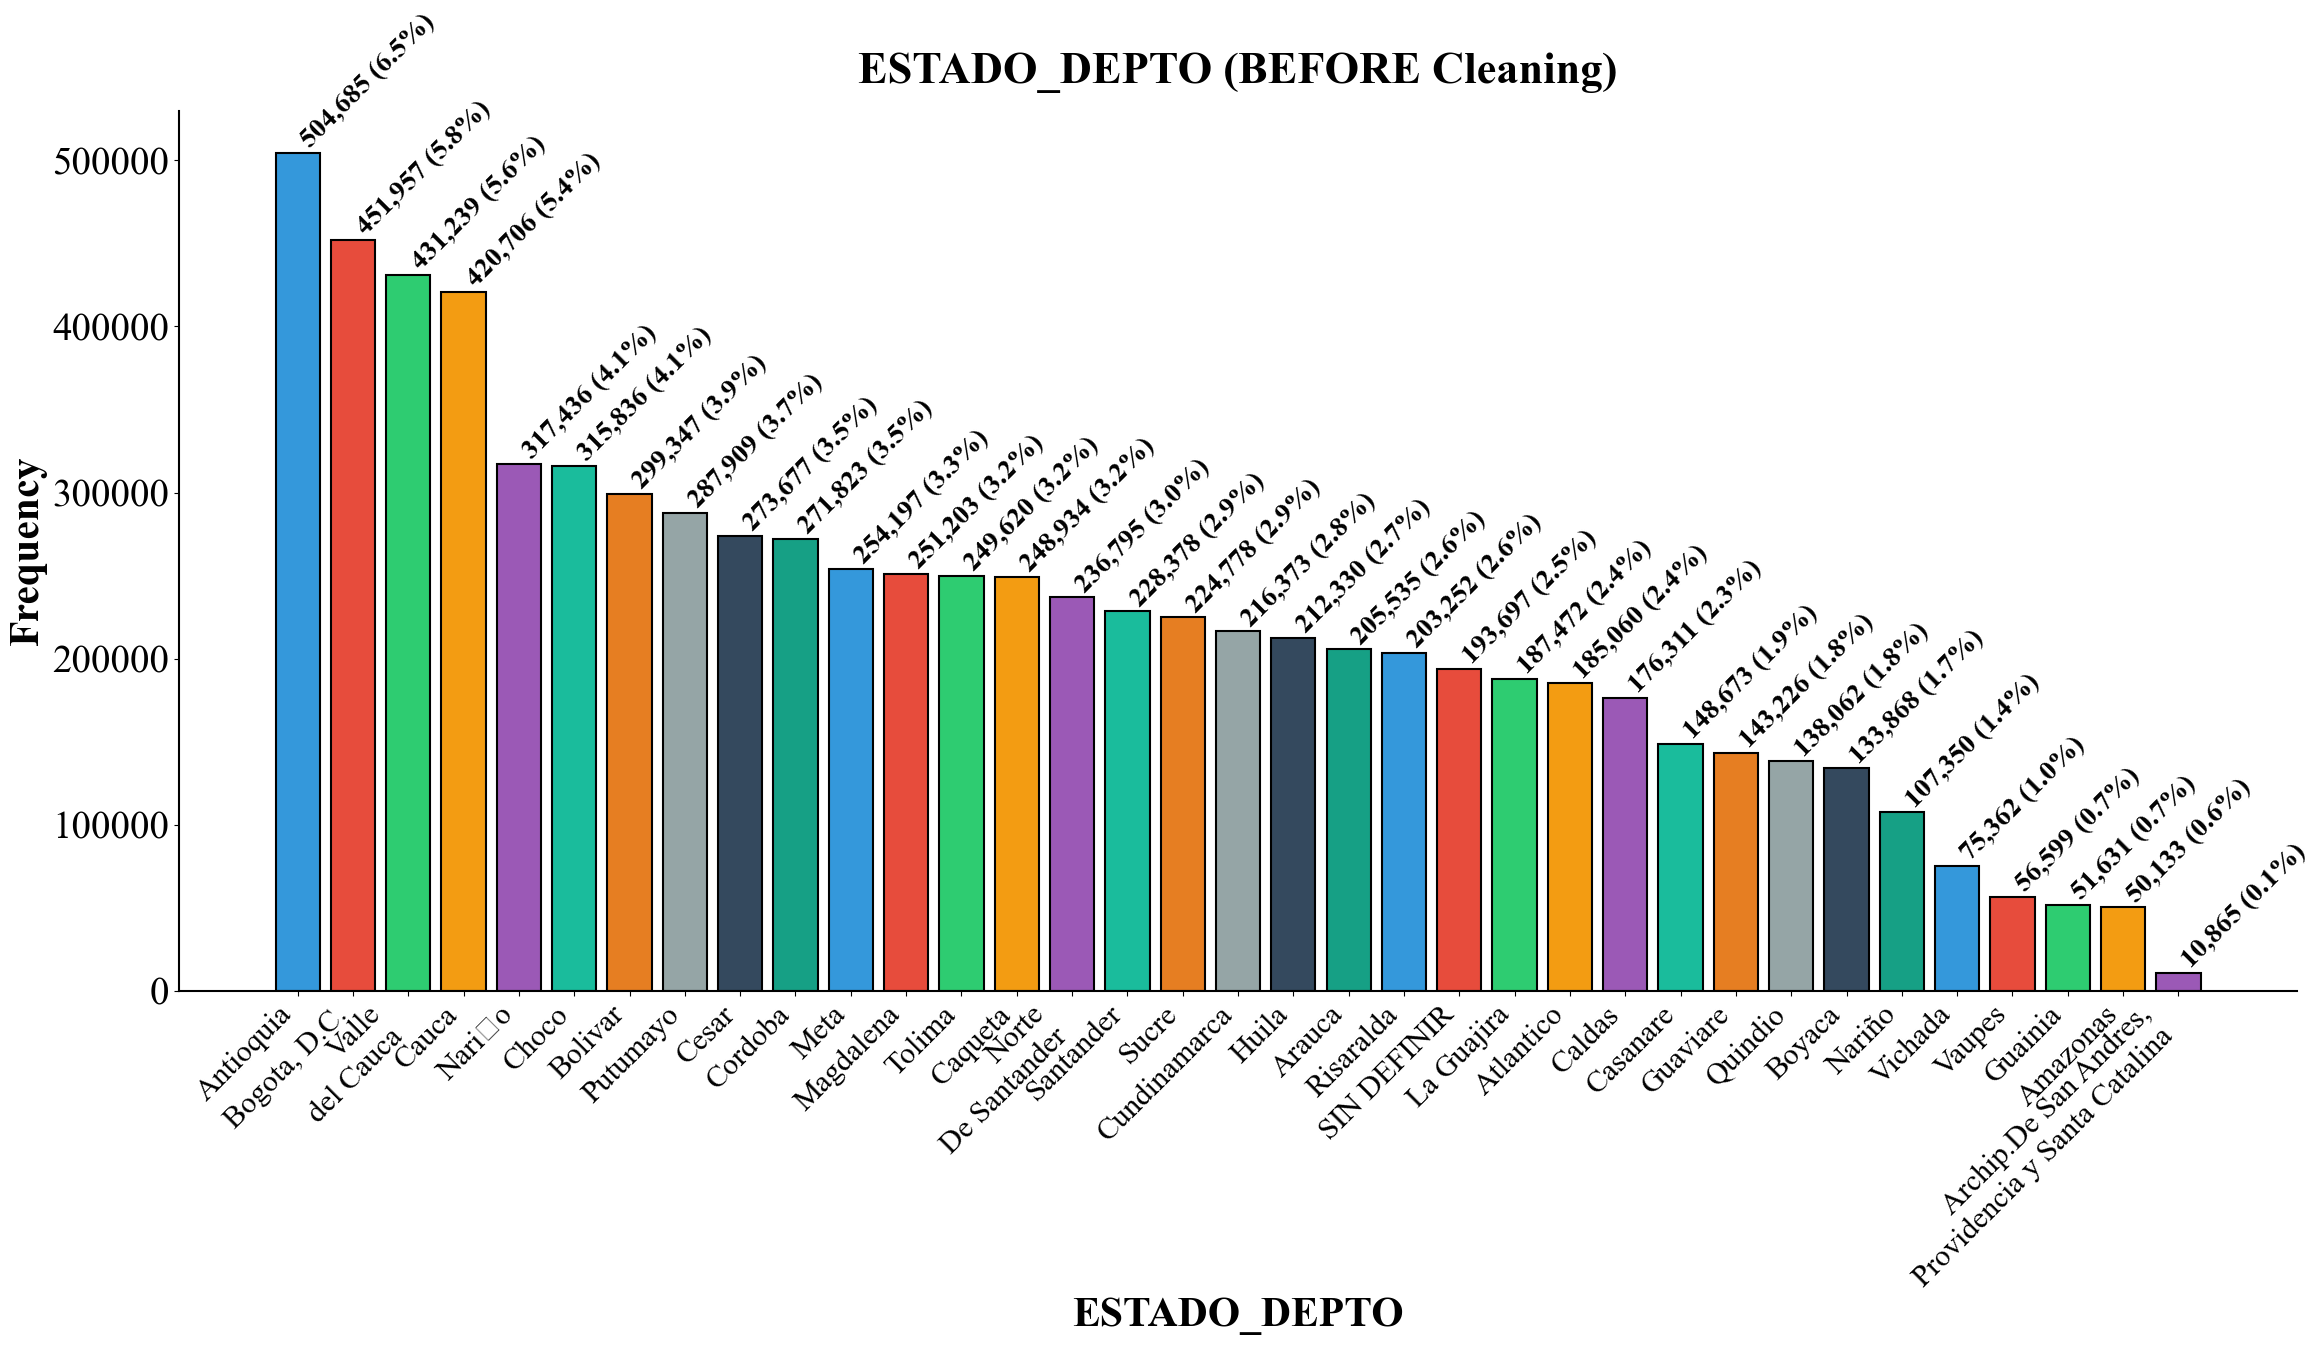

In [13]:
fig, ax = plt.subplots(1, 1, figsize=(24, 14))

hecho_top10 = df_raw['ESTADO_DEPTO'].value_counts()
colors = [COLOR_PRIMARY, COLOR_SECONDARY, COLOR_TERTIARY, COLOR_QUATERNARY, 
          COLOR_PURPLE, COLOR_TEAL, '#E67E22', '#95A5A6', '#34495E', '#16A085']

# Función para dividir etiquetas largas en dos líneas si tienen más de dos palabras
def split_label(label):
    words = label.split()
    if len(words) > 2:
        mid = len(words) // 2
        return ' '.join(words[:mid]) + '\n' + ' '.join(words[mid:])
    return label

# Aplicar la función a las etiquetas
labels = [split_label(h[:60] + '...' if len(h) > 60 else h) for h in hecho_top10.index]

# Barras verticales
bars = ax.bar(range(len(hecho_top10)), hecho_top10.values,
              color=colors[:len(hecho_top10)], edgecolor='black', linewidth=1.5)

ax.set_xticks(range(len(hecho_top10)))
ax.set_xticklabels(labels, fontsize=22, rotation=45, ha='right')

ax.set_xlabel('ESTADO_DEPTO', fontsize=FONT_SIZE_LABELS, fontweight='bold')
ax.set_ylabel('Frequency', fontsize=FONT_SIZE_LABELS, fontweight='bold')
ax.set_title('ESTADO_DEPTO (BEFORE Cleaning)',
             fontsize=FONT_SIZE_TITLE, fontweight='bold', pad=20)

# Etiquetas en la punta de cada barra
for i, (bar, val) in enumerate(zip(bars, hecho_top10.values)):
    pct = (val / len(df_raw) * 100)
    ax.text(i, val, f'{val:,} ({pct:.1f}%)',
            ha='left', va='bottom', rotation=45,
            fontsize=20, fontweight='bold')

apply_apa_style(ax)
plt.tight_layout()
plt.savefig('fig/01_exploratory_analysis/before_cleaning/01_ESTADO_DEPTO.png',
            dpi=DPI_SETTING, bbox_inches='tight')
plt.show()
plt.close()

It can be seen that there are some problems with some category names, and it is clear that they are repeated with some typographical changes. Also, it can be seen that there is a 2.5 % of the sample without definition of its state (departamento). This will be corrected later.

## 6.2. VIGENCIA

  ✓ Saved: 02_vigencia_distribution_before.png


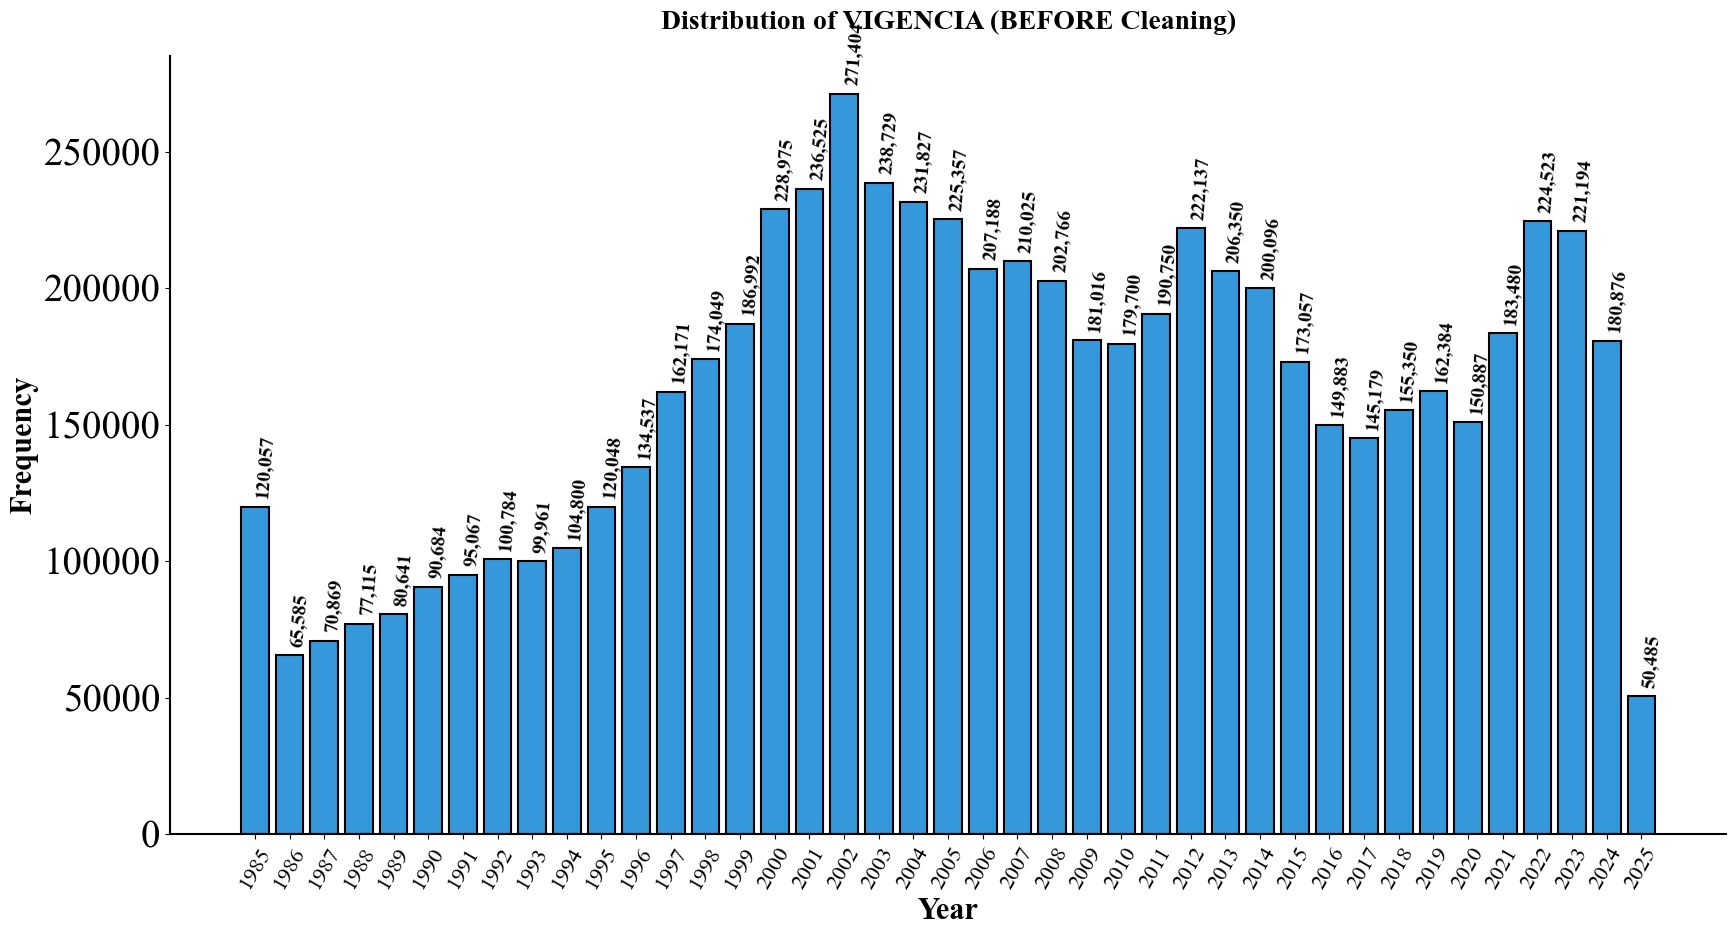

In [14]:
fig, ax = plt.subplots(1, 1, figsize=(18, 10))

# Conteos por año
vigencia_counts = df_raw['VIGENCIA'].value_counts().sort_index()

# Bar chart
bars = ax.bar(vigencia_counts.index.astype(int),
              vigencia_counts.values,
              color=COLOR_PRIMARY,
              edgecolor='black',
              linewidth=1.5)

# Labels y título
ax.set_xlabel('Year', fontsize=FONT_SIZE_LABELS-8, fontweight='bold')
ax.set_ylabel('Frequency', fontsize=FONT_SIZE_LABELS-8, fontweight='bold')
ax.set_title('Distribution of VIGENCIA (BEFORE Cleaning)',
             fontsize=FONT_SIZE_TITLE-12, fontweight='bold', pad=20)

# Rotación de años para que se lean bien
ax.set_xticks(vigencia_counts.index.astype(int))
ax.set_xticklabels(vigencia_counts.index.astype(int), rotation=60,
                   fontsize=FONT_SIZE_TICKS-12)

# Etiquetas de valores encima de cada barra
for x, y in zip(vigencia_counts.index, vigencia_counts.values):
    ax.text(
        x, 
        y + max(vigencia_counts) * 0.01,
        f'{y:,}',
        ha='left',          # se ve mejor al rotar
        va='bottom',
        rotation=85,        # diagonal
        fontsize=FONT_SIZE_ANNOTATIONS-10,
        fontweight='bold'
    )

# Estilo APA
apply_apa_style(ax)

plt.tight_layout()
plt.savefig('fig/01_exploratory_analysis/before_cleaning/02_vigencia_distribution_before.png',
            dpi=DPI_SETTING, bbox_inches='tight')
print("  ✓ Saved: 02_vigencia_distribution_before.png")
plt.show()
plt.close()


## 6.3. HECHO

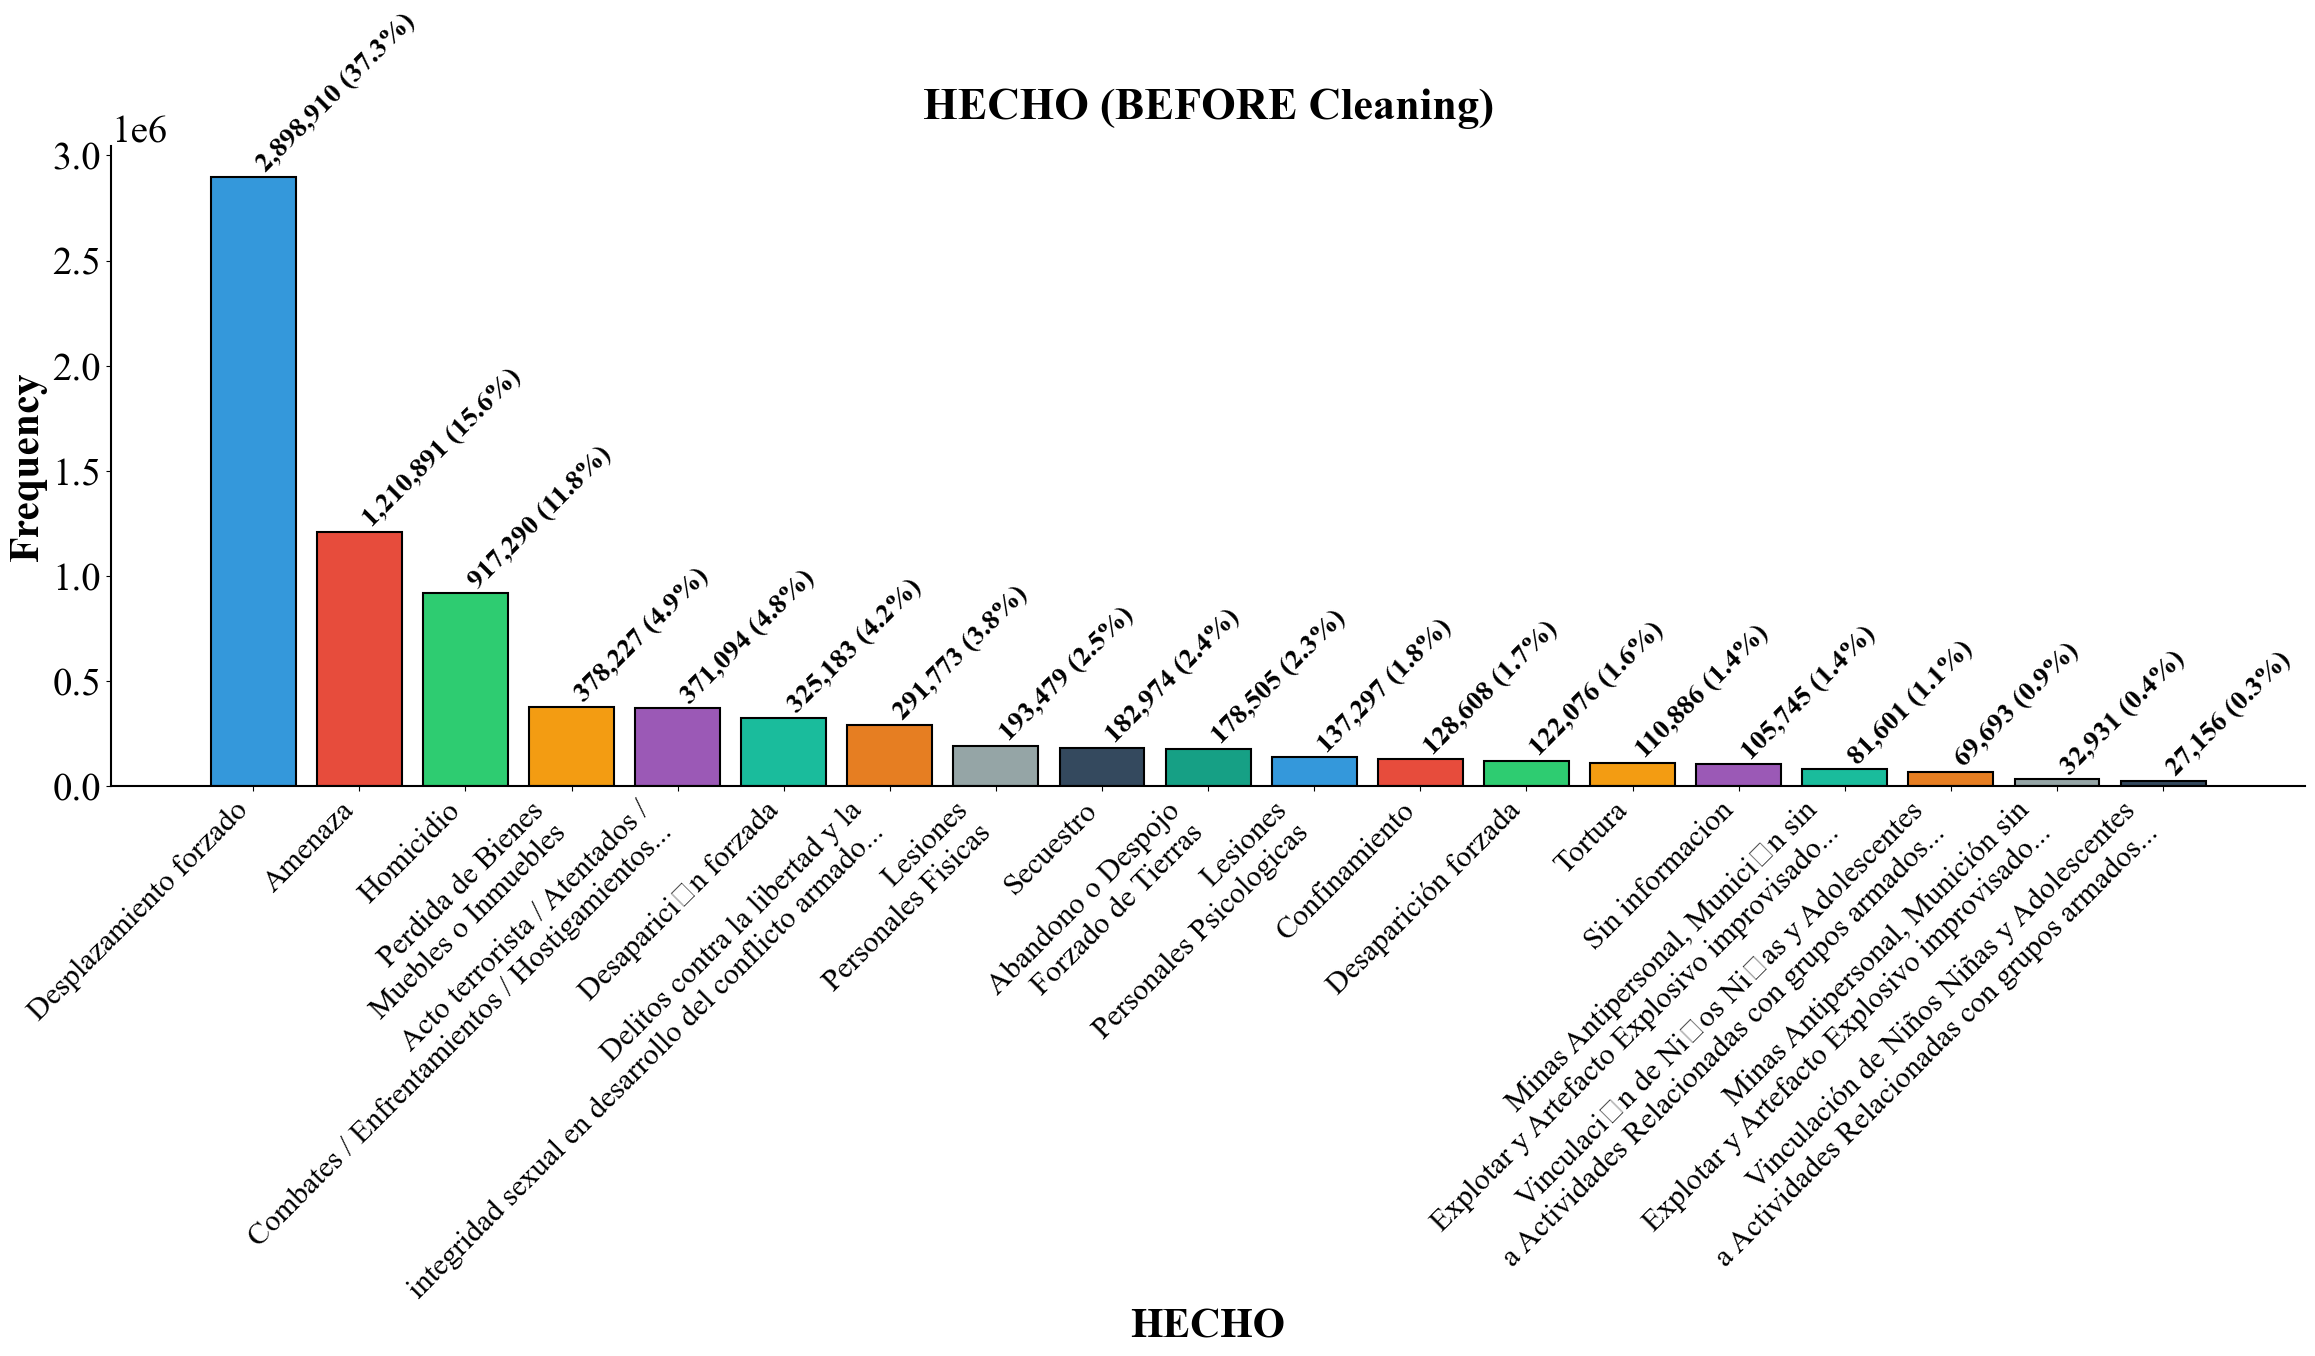

In [15]:
fig, ax = plt.subplots(1, 1, figsize=(24, 14))

hecho_top10 = df_raw['HECHO'].value_counts()
colors = [COLOR_PRIMARY, COLOR_SECONDARY, COLOR_TERTIARY, COLOR_QUATERNARY, 
          COLOR_PURPLE, COLOR_TEAL, '#E67E22', '#95A5A6', '#34495E', '#16A085']

# Función para dividir etiquetas largas en dos líneas si tienen más de dos palabras
def split_label(label):
    words = label.split()
    if len(words) > 2:
        mid = len(words) // 2
        return ' '.join(words[:mid]) + '\n' + ' '.join(words[mid:])
    return label

# Aplicar la función a las etiquetas
labels = [split_label(h[:90] + '...' if len(h) > 60 else h) for h in hecho_top10.index]

# Barras verticales
bars = ax.bar(range(len(hecho_top10)), hecho_top10.values,
              color=colors[:len(hecho_top10)], edgecolor='black', linewidth=1.5)

ax.set_xticks(range(len(hecho_top10)))
ax.set_xticklabels(labels, fontsize=22, rotation=45, ha='right')

ax.set_xlabel('HECHO', fontsize=FONT_SIZE_LABELS, fontweight='bold')
ax.set_ylabel('Frequency', fontsize=FONT_SIZE_LABELS, fontweight='bold')
ax.set_title('HECHO (BEFORE Cleaning)',
             fontsize=FONT_SIZE_TITLE, fontweight='bold', pad=20)

# Etiquetas en la punta de cada barra
for i, (bar, val) in enumerate(zip(bars, hecho_top10.values)):
    pct = (val / len(df_raw) * 100)
    ax.text(i, val, f'{val:,} ({pct:.1f}%)',
            ha='left', va='bottom', rotation=45,
            fontsize=20, fontweight='bold')

apply_apa_style(ax)
plt.tight_layout()
plt.savefig('fig/01_exploratory_analysis/before_cleaning/03_HECHO.png',
            dpi=DPI_SETTING, bbox_inches='tight')
plt.show()
plt.close()


It can be seen that there are some problems with some category names, and it is clear that they are repeated with some typographical changes. 

## 6.4. SEXO

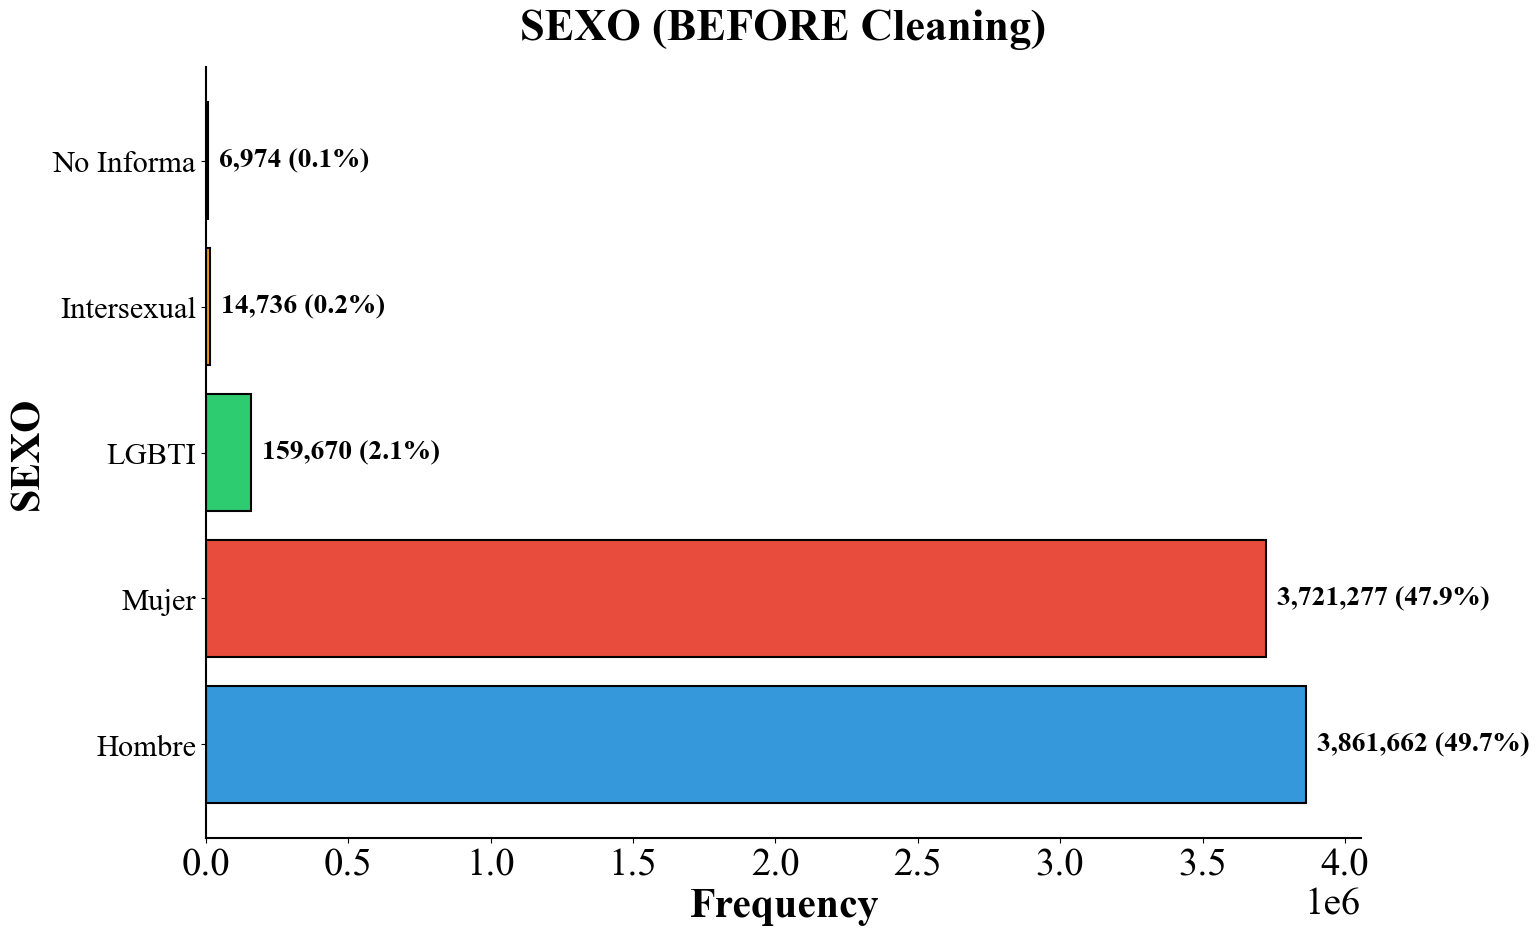

In [16]:
fig, ax = plt.subplots(1, 1, figsize=(16, 10))

hecho_top10 = df_raw['SEXO'].value_counts()
colors = [COLOR_PRIMARY, COLOR_SECONDARY, COLOR_TERTIARY, COLOR_QUATERNARY, 
          COLOR_PURPLE, COLOR_TEAL, '#E67E22', '#95A5A6', '#34495E', '#16A085']

bars = ax.barh(range(len(hecho_top10)), hecho_top10.values,
               color=colors, edgecolor='black', linewidth=1.5)

ax.set_yticks(range(len(hecho_top10)))
# Keep original Spanish names
ax.set_yticklabels([h[:60] + '...' if len(h) > 60 else h for h in hecho_top10.index], 
                   fontsize=22)
ax.set_xlabel('Frequency', fontsize=FONT_SIZE_LABELS, fontweight='bold')
ax.set_ylabel('SEXO', fontsize=FONT_SIZE_LABELS, fontweight='bold')
ax.set_title('SEXO (BEFORE Cleaning)',
             fontsize=FONT_SIZE_TITLE, fontweight='bold', pad=20)

for i, (bar, val) in enumerate(zip(bars, hecho_top10.values)):
    pct = (val / len(df_raw) * 100)
    ax.text(val + max(hecho_top10)*0.01, i, f'{val:,} ({pct:.1f}%)',
           va='center', fontsize=20, fontweight='bold')

apply_apa_style(ax)
plt.tight_layout()
plt.savefig('fig/01_exploratory_analysis/before_cleaning/03_SEXO.png',
            dpi=DPI_SETTING, bbox_inches='tight')
plt.show()
plt.close()

## 6.5. ETNIA

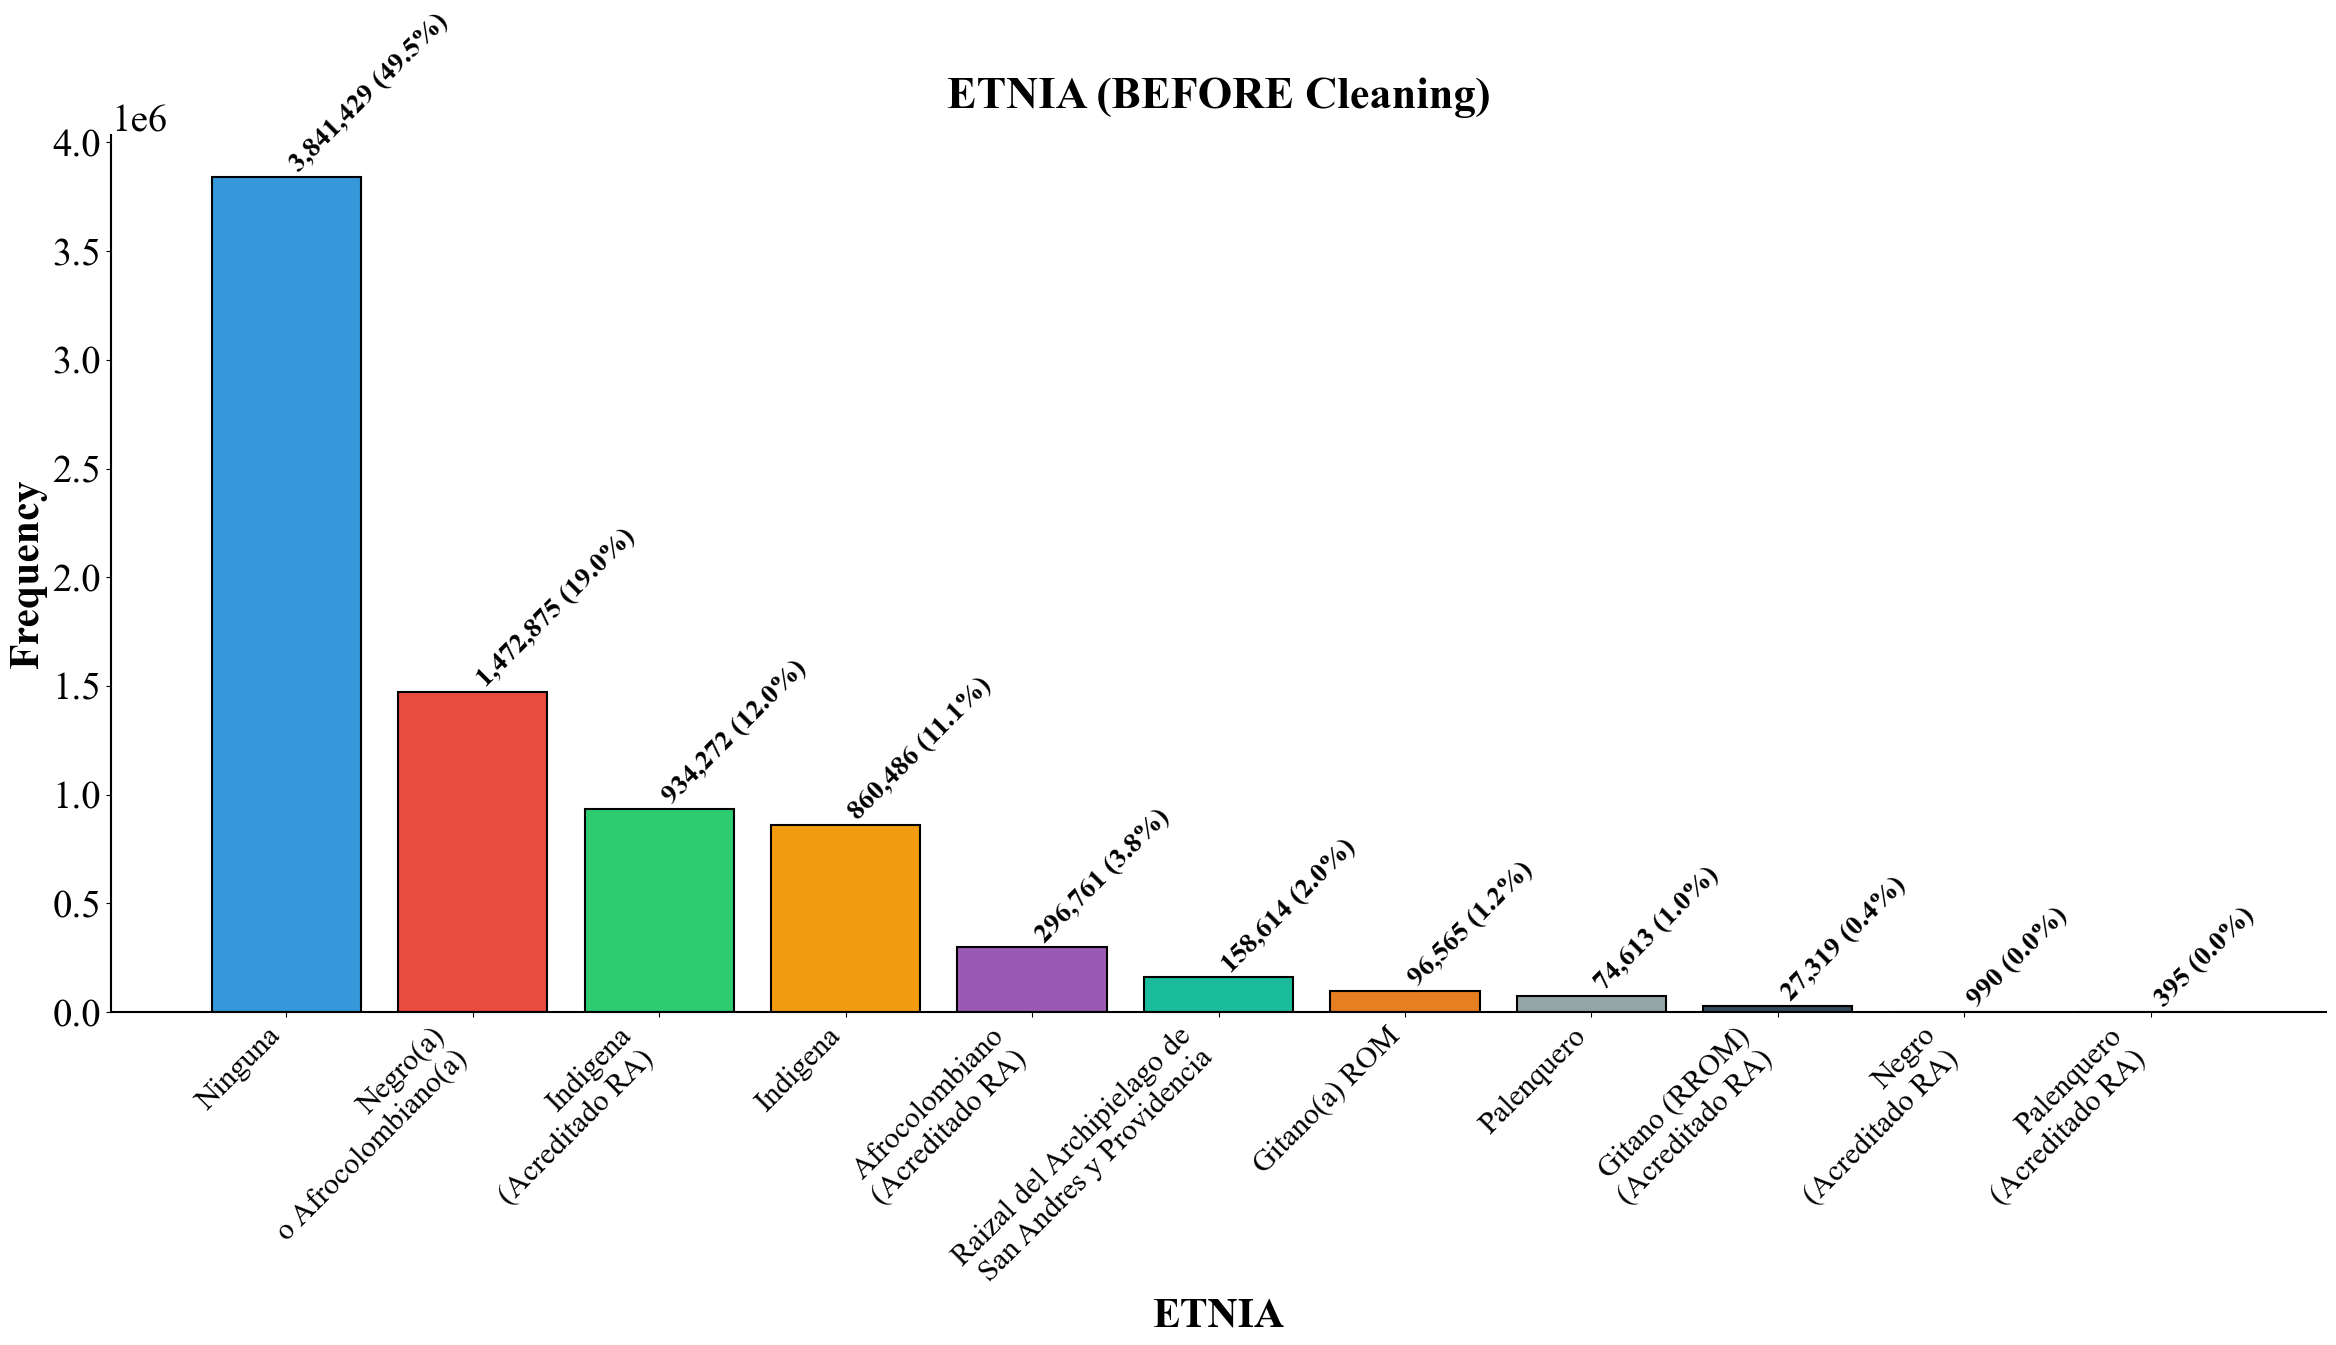

In [17]:
fig, ax = plt.subplots(1, 1, figsize=(24, 14))

hecho_top10 = df_raw['ETNIA'].value_counts()
colors = [COLOR_PRIMARY, COLOR_SECONDARY, COLOR_TERTIARY, COLOR_QUATERNARY, 
          COLOR_PURPLE, COLOR_TEAL, '#E67E22', '#95A5A6', '#34495E', '#16A085']

# Función para dividir etiquetas largas en dos líneas si tienen más de dos palabras
def split_label(label):
    words = label.split()
    if len(words) > 2:
        mid = len(words) // 2
        return ' '.join(words[:mid]) + '\n' + ' '.join(words[mid:])
    return label

# Aplicar la función a las etiquetas
labels = [split_label(h[:90] + '...' if len(h) > 60 else h) for h in hecho_top10.index]

# Barras verticales
bars = ax.bar(range(len(hecho_top10)), hecho_top10.values,
              color=colors[:len(hecho_top10)], edgecolor='black', linewidth=1.5)

ax.set_xticks(range(len(hecho_top10)))
ax.set_xticklabels(labels, fontsize=22, rotation=45, ha='right')

ax.set_xlabel('ETNIA', fontsize=FONT_SIZE_LABELS, fontweight='bold')
ax.set_ylabel('Frequency', fontsize=FONT_SIZE_LABELS, fontweight='bold')
ax.set_title('ETNIA (BEFORE Cleaning)',
             fontsize=FONT_SIZE_TITLE, fontweight='bold', pad=20)

# Etiquetas en la punta de cada barra
for i, (bar, val) in enumerate(zip(bars, hecho_top10.values)):
    pct = (val / len(df_raw) * 100)
    ax.text(i, val, f'{val:,} ({pct:.1f}%)',
            ha='left', va='bottom', rotation=45,
            fontsize=20, fontweight='bold')

apply_apa_style(ax)
plt.tight_layout()
plt.savefig('fig/01_exploratory_analysis/before_cleaning/03_ETNIA.png',
            dpi=DPI_SETTING, bbox_inches='tight')
plt.show()
plt.close()


The categories in which you are accredited (acreditado ) or not will be grouped into a single category.

## 6.6. DISCAPACIDAD

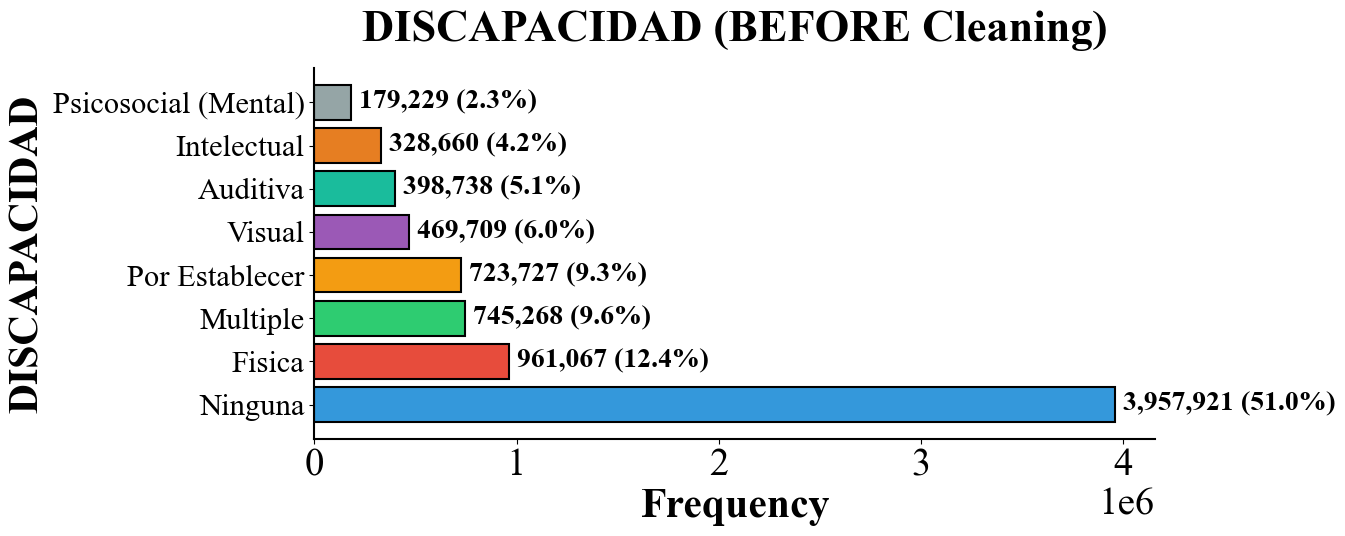

In [18]:
fig, ax = plt.subplots(1, 1, figsize=(14, 6))

hecho_top10 = df_raw['DISCAPACIDAD'].value_counts()
colors = [COLOR_PRIMARY, COLOR_SECONDARY, COLOR_TERTIARY, COLOR_QUATERNARY, 
          COLOR_PURPLE, COLOR_TEAL, '#E67E22', '#95A5A6', '#34495E', '#16A085']

bars = ax.barh(range(len(hecho_top10)), hecho_top10.values,
               color=colors, edgecolor='black', linewidth=1.5)

ax.set_yticks(range(len(hecho_top10)))
# Keep original Spanish names
ax.set_yticklabels([h[:60] + '...' if len(h) > 60 else h for h in hecho_top10.index], 
                   fontsize=22)
ax.set_xlabel('Frequency', fontsize=FONT_SIZE_LABELS, fontweight='bold')
ax.set_ylabel('DISCAPACIDAD', fontsize=FONT_SIZE_LABELS, fontweight='bold')
ax.set_title('DISCAPACIDAD (BEFORE Cleaning)',
             fontsize=FONT_SIZE_TITLE, fontweight='bold', pad=20)

for i, (bar, val) in enumerate(zip(bars, hecho_top10.values)):
    pct = (val / len(df_raw) * 100)
    ax.text(val + max(hecho_top10)*0.01, i, f'{val:,} ({pct:.1f}%)',
           va='center', fontsize=20, fontweight='bold')

apply_apa_style(ax)
plt.tight_layout()
plt.savefig('fig/01_exploratory_analysis/before_cleaning/03_DISCAPACIDAD.png',
            dpi=DPI_SETTING, bbox_inches='tight')
plt.show()
plt.close()

## 6.7. CICLO_VITAL

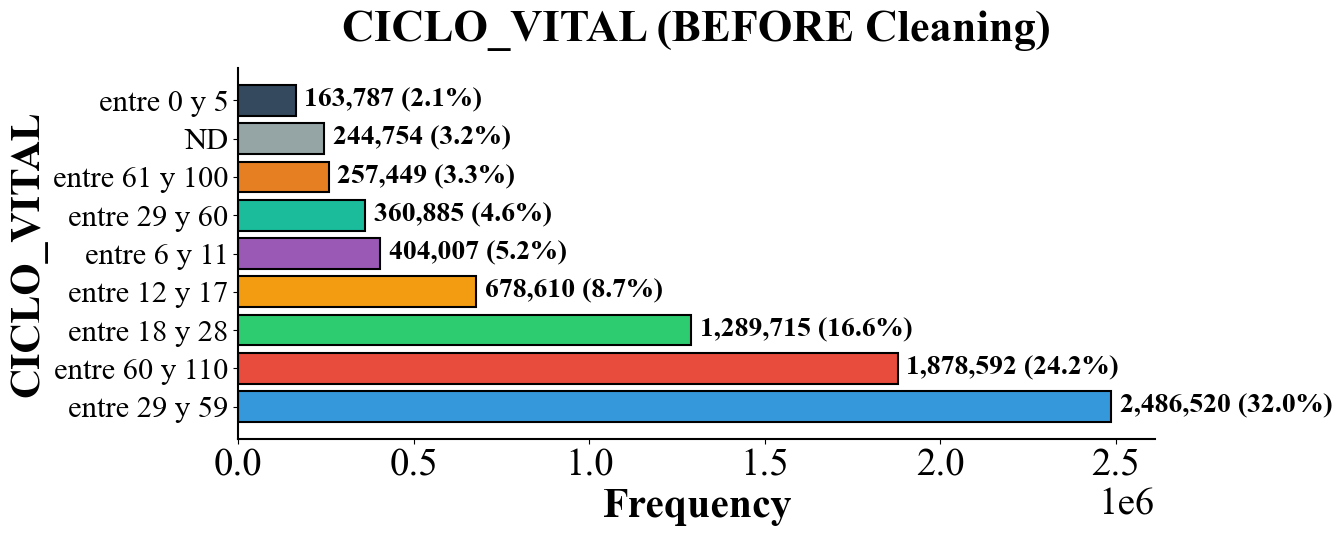

In [19]:
fig, ax = plt.subplots(1, 1, figsize=(14, 6))

hecho_top10 = df_raw['CICLO_VITAL'].value_counts()
colors = [COLOR_PRIMARY, COLOR_SECONDARY, COLOR_TERTIARY, COLOR_QUATERNARY, 
          COLOR_PURPLE, COLOR_TEAL, '#E67E22', '#95A5A6', '#34495E', '#16A085']

bars = ax.barh(range(len(hecho_top10)), hecho_top10.values,
               color=colors, edgecolor='black', linewidth=1.5)

ax.set_yticks(range(len(hecho_top10)))
# Keep original Spanish names
ax.set_yticklabels([h[:60] + '...' if len(h) > 60 else h for h in hecho_top10.index], 
                   fontsize=22)
ax.set_xlabel('Frequency', fontsize=FONT_SIZE_LABELS, fontweight='bold')
ax.set_ylabel('CICLO_VITAL', fontsize=FONT_SIZE_LABELS, fontweight='bold')
ax.set_title('CICLO_VITAL (BEFORE Cleaning)',
             fontsize=FONT_SIZE_TITLE, fontweight='bold', pad=20)

for i, (bar, val) in enumerate(zip(bars, hecho_top10.values)):
    pct = (val / len(df_raw) * 100)
    ax.text(val + max(hecho_top10)*0.01, i, f'{val:,} ({pct:.1f}%)',
           va='center', fontsize=20, fontweight='bold')

apply_apa_style(ax)
plt.tight_layout()
plt.savefig('fig/01_exploratory_analysis/before_cleaning/03_CICLO_VITAL.png',
            dpi=DPI_SETTING, bbox_inches='tight')
plt.show()
plt.close()

Two categories need to be corrected. When consulting the $$datos abiertos$$ website, the following ranges can be observed for CICLO_VITAL:

- entre 0 y 5 
- entre 6 y 11
- entre 12 y 17
- entre 18 y 28
- entre 29 y 60 
- entre 61 y 100
​

As can be seen, not all ranks match those in the dataset, so only those that are repeated were corrected according to the logic of the ranks shown on the website. The following are incorrectly typed as the age ranges are not preserved and must be corrected:

- 'entre 29 y 59' $\rightarrow$ 'entre 29 y 60',
- 'entre 61 y 100' $\rightarrow$ 'entre 60 y 110'

It is left as 'entre 60 y 110' and not 'entre 60 y 100' since there may have been people over 100 years old registered

## 6.8. PER_OCU

PER_OCU was plotted against VIGENCIA

In [20]:
df_raw['PER_OCU'].describe()

count    7.750538e+06
mean     2.836355e+01
std      3.650113e+02
min      0.000000e+00
25%      1.000000e+00
50%      1.000000e+00
75%      4.000000e+00
max      3.067980e+05
Name: PER_OCU, dtype: float64

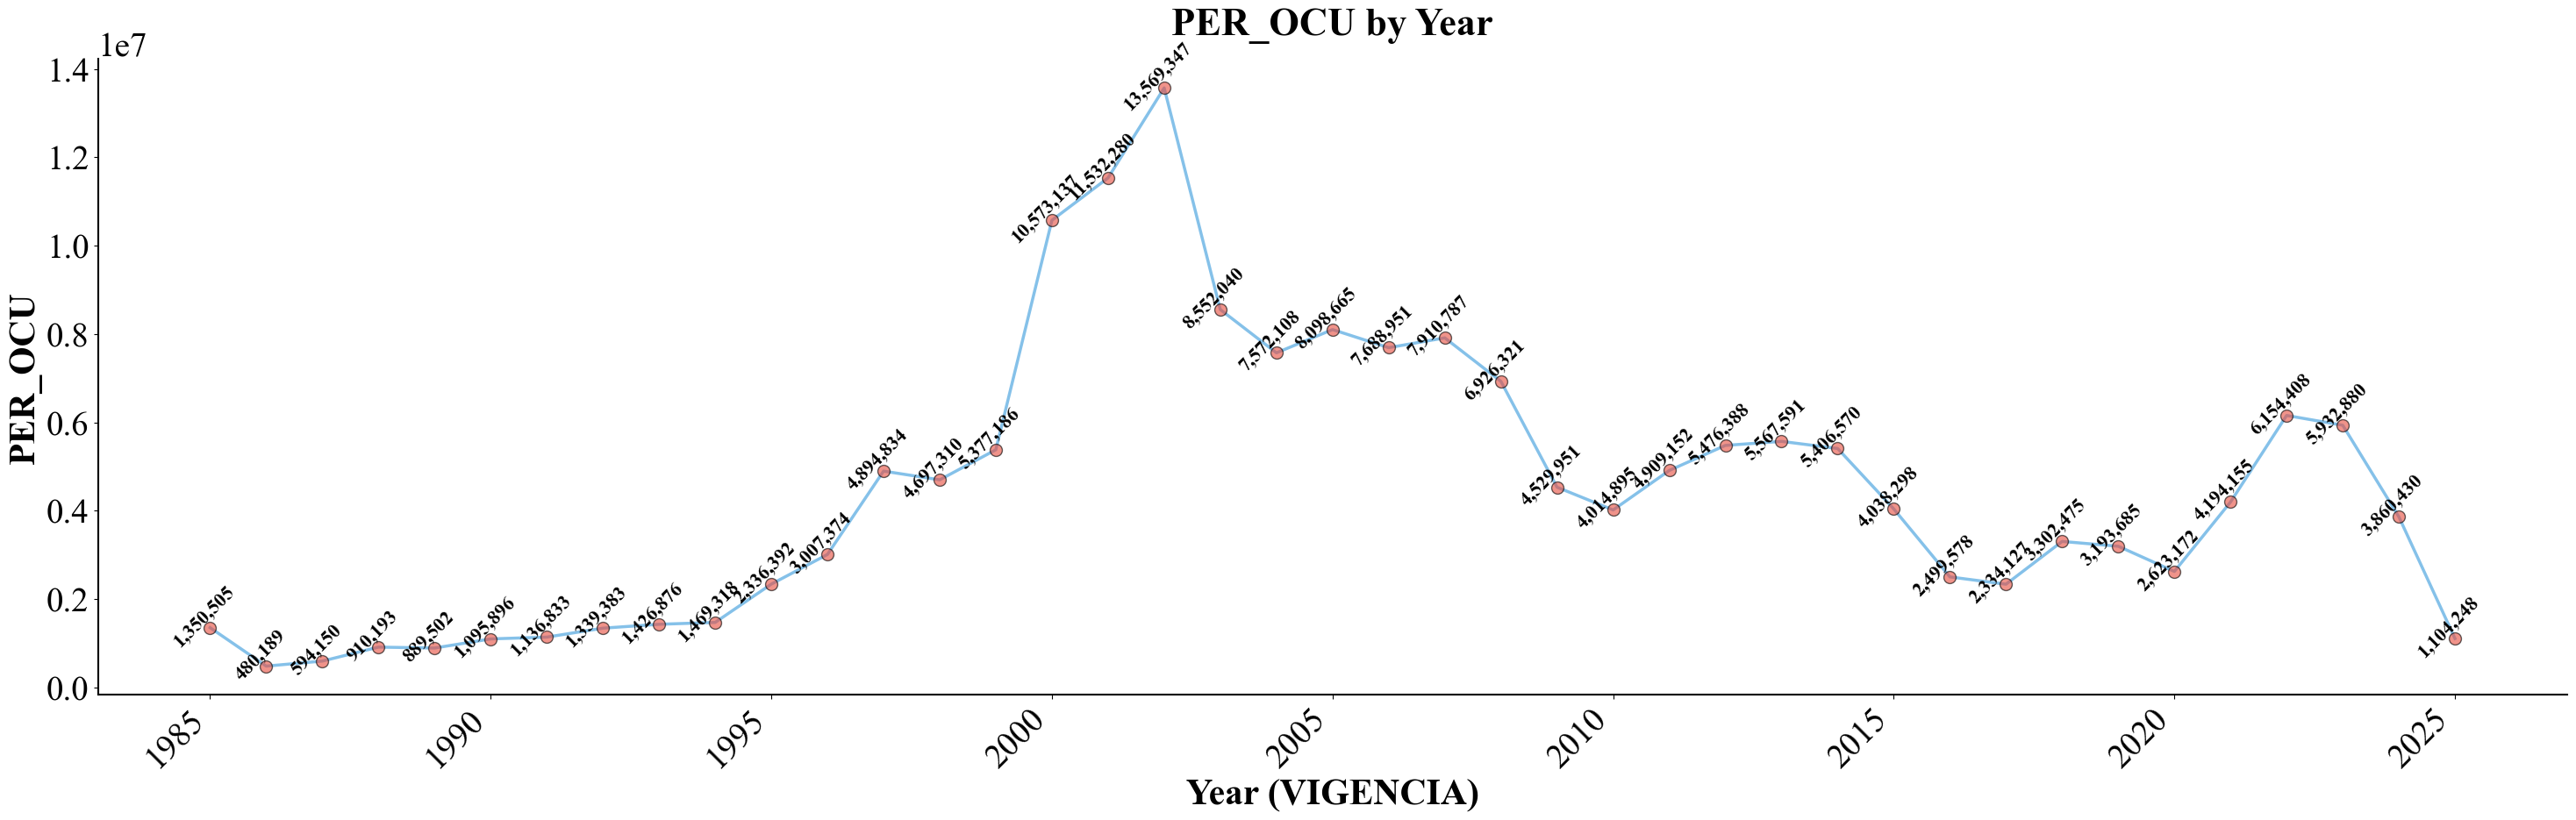

In [21]:
fig, ax = plt.subplots(1, 1, figsize=(30, 10))

per_ocu_by_year = df_raw.groupby('VIGENCIA')['PER_OCU'].sum().sort_index()

ax.plot(per_ocu_by_year.index, per_ocu_by_year.values,
        color=COLOR_PRIMARY, linewidth=2.5, marker='o', markersize=10,
        markerfacecolor=COLOR_SECONDARY, markeredgecolor='black', alpha=0.6)

ax.set_xlabel('Year (VIGENCIA)', fontsize=FONT_SIZE_LABELS, fontweight='bold')
ax.set_ylabel('PER_OCU', fontsize=FONT_SIZE_LABELS, fontweight='bold')
ax.set_title('PER_OCU by Year',
             fontsize=FONT_SIZE_TITLE, fontweight='bold', pad=20)

plt.xticks(rotation=45, ha='right')

for x, y in zip(per_ocu_by_year.index, per_ocu_by_year.values):
    ax.text(x, y + max(per_ocu_by_year.values)*0.01, f'{y:,.0f}',
            ha='center', va='bottom', fontsize=16, fontweight='bold',
            rotation=45, rotation_mode='anchor')
    
apply_apa_style(ax)
# plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.savefig('fig/01_exploratory_analysis/before_cleaning/08_PER_OCU_curve.png',
            dpi=DPI_SETTING, bbox_inches='tight')
plt.show()
plt.close()

## 6.9. PER_DECLA

PER_DECLA was plotted against VIGENCIA

In [22]:
df_raw['PER_DECLA'].describe()

count    7.749447e+06
mean     2.858136e+01
std      3.546884e+02
min      0.000000e+00
25%      0.000000e+00
50%      1.000000e+00
75%      4.000000e+00
max      2.917890e+05
Name: PER_DECLA, dtype: float64

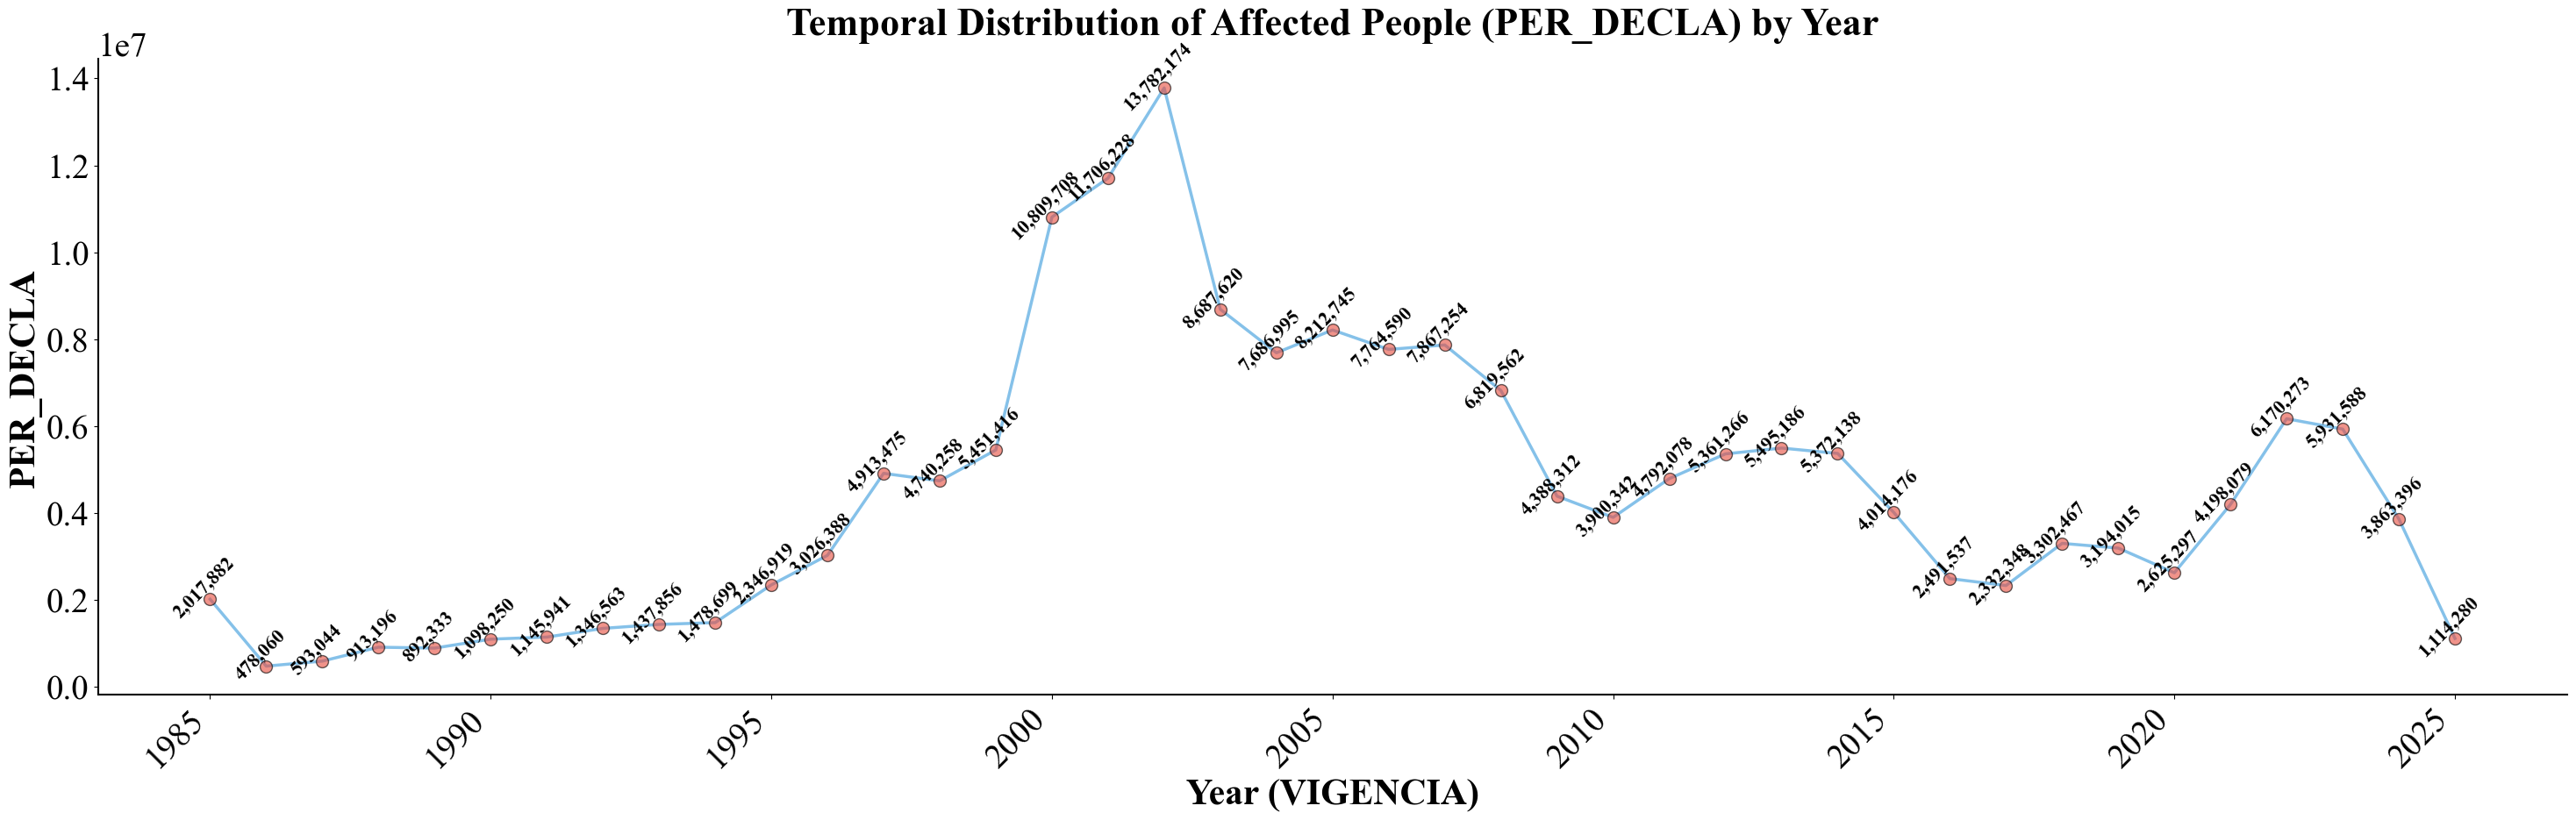

In [23]:
fig, ax = plt.subplots(1, 1, figsize=(30, 10))

# Agrupar por año y sumar los valores de PER_DECLA
per_ocu_by_year = df_raw.groupby('VIGENCIA')['PER_DECLA'].sum().sort_index()

# Graficar la tendencia temporal
ax.plot(per_ocu_by_year.index, per_ocu_by_year.values,
        color=COLOR_PRIMARY, linewidth=2.5, marker='o', markersize=10,
        markerfacecolor=COLOR_SECONDARY, markeredgecolor='black', alpha=0.6)

# Etiquetas de los ejes (en inglés)
ax.set_xlabel('Year (VIGENCIA)', fontsize=FONT_SIZE_LABELS, fontweight='bold')
ax.set_ylabel('PER_DECLA', fontsize=FONT_SIZE_LABELS, fontweight='bold')
ax.set_title('Temporal Distribution of Affected People (PER_DECLA) by Year',
             fontsize=FONT_SIZE_TITLE, fontweight='bold', pad=20)

# Rotar las etiquetas del eje X a 45 grados
plt.xticks(rotation=45, ha='right')

# Mostrar etiquetas numéricas sobre cada punto
for x, y in zip(per_ocu_by_year.index, per_ocu_by_year.values):
    ax.text(x, y + max(per_ocu_by_year.values)*0.01, f'{y:,.0f}',
            ha='center', va='bottom', fontsize=16, fontweight='bold',
            rotation=45, rotation_mode='anchor')

# Estilo general APA
apply_apa_style(ax)
# plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.savefig('fig/01_exploratory_analysis/before_cleaning/09_PER_DECLA_curve.png',
            dpi=DPI_SETTING, bbox_inches='tight')
plt.show()
plt.close()

## 6.10. EVENTOS


EVENTOS was plotted against VIGENCIA

In [24]:
df_raw['EVENTOS'].describe()

count    7.750538e+06
mean     2.917113e+01
std      3.945136e+02
min      0.000000e+00
25%      1.000000e+00
50%      1.000000e+00
75%      4.000000e+00
max      3.519050e+05
Name: EVENTOS, dtype: float64

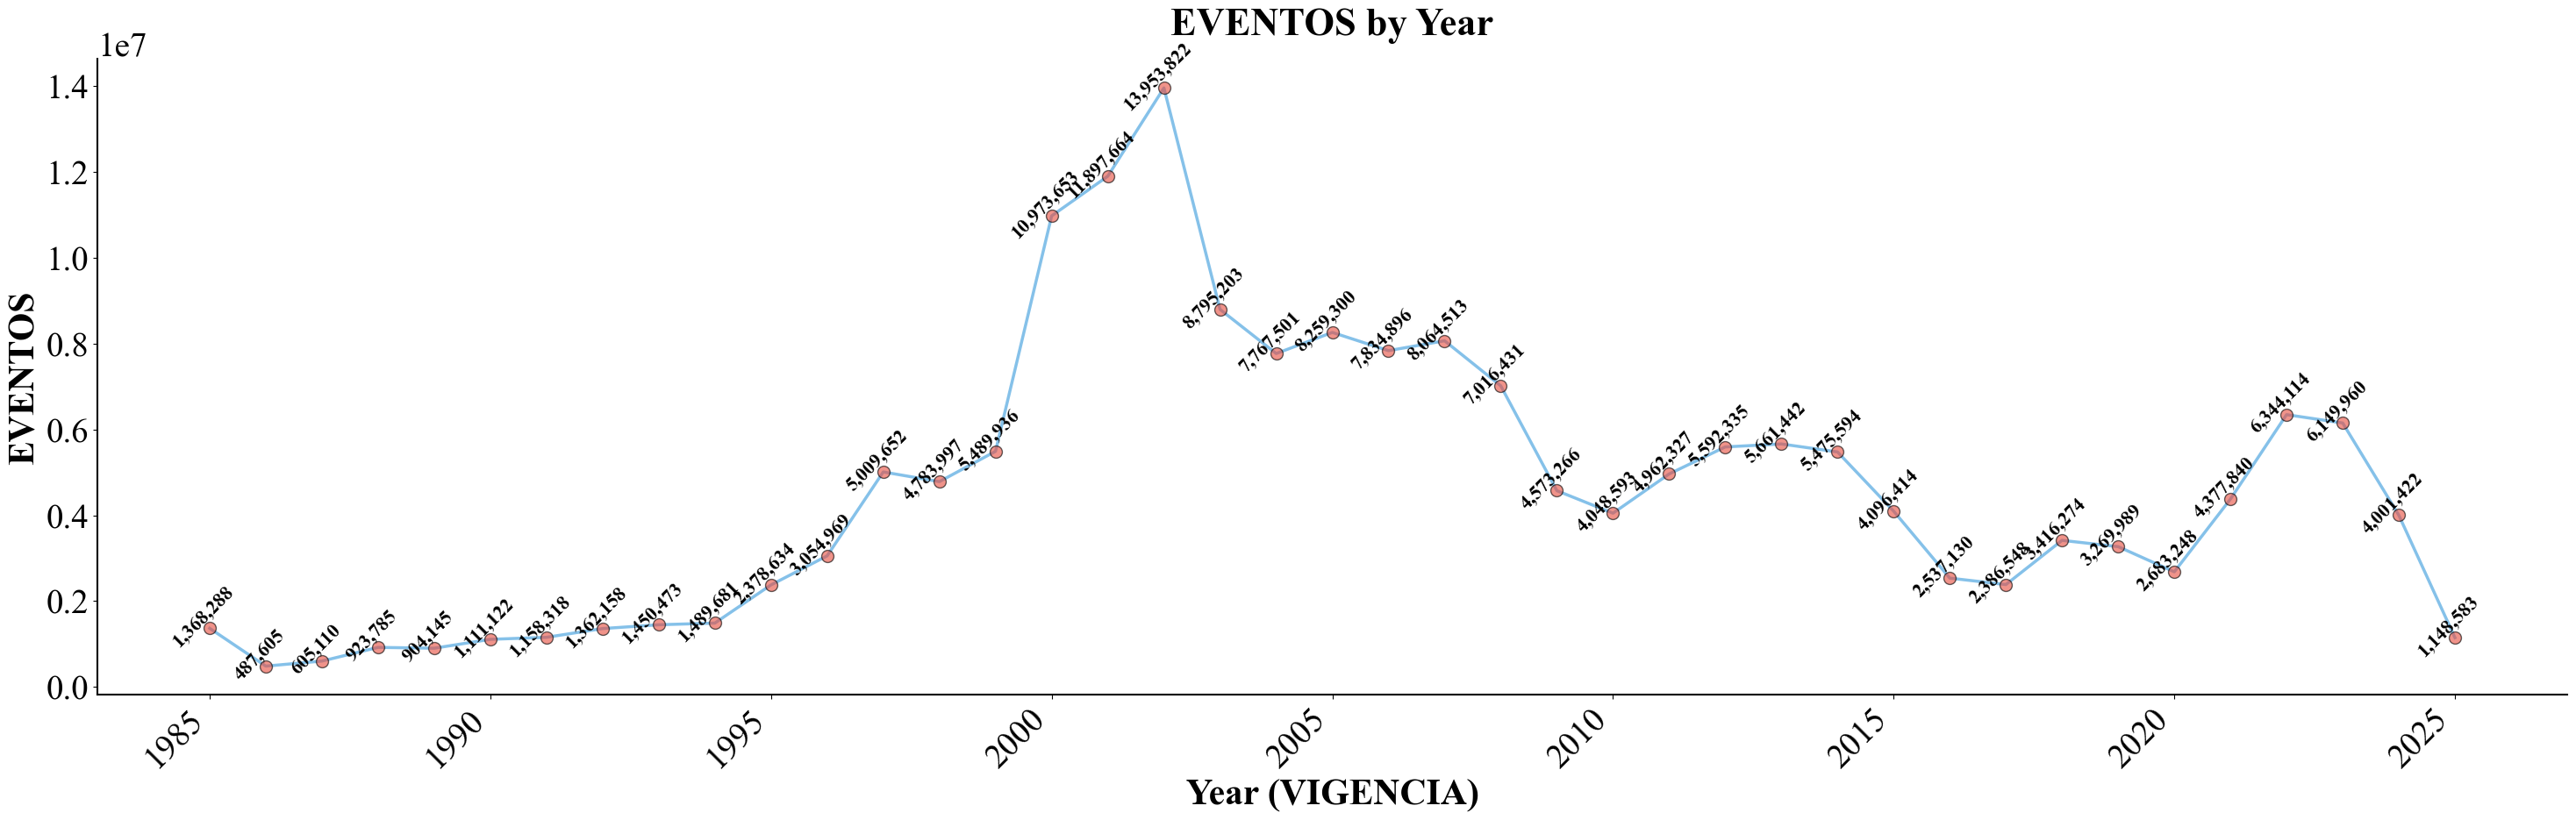

In [25]:
fig, ax = plt.subplots(1, 1, figsize=(30, 10))

# Agrupar por año y sumar los valores de EVENTOS
per_ocu_by_year = df_raw.groupby('VIGENCIA')['EVENTOS'].sum().sort_index()

# Graficar la tendencia temporal
ax.plot(per_ocu_by_year.index, per_ocu_by_year.values,
        color=COLOR_PRIMARY, linewidth=2.5, marker='o', markersize=10,
        markerfacecolor=COLOR_SECONDARY, markeredgecolor='black', alpha=0.6)

# Etiquetas de los ejes (en inglés)
ax.set_xlabel('Year (VIGENCIA)', fontsize=FONT_SIZE_LABELS, fontweight='bold')
ax.set_ylabel('EVENTOS', fontsize=FONT_SIZE_LABELS, fontweight='bold')
ax.set_title('EVENTOS by Year',
             fontsize=FONT_SIZE_TITLE, fontweight='bold', pad=20)

# Rotar las etiquetas del eje X a 45 grados
plt.xticks(rotation=45, ha='right')

# Mostrar etiquetas numéricas sobre cada punto
for x, y in zip(per_ocu_by_year.index, per_ocu_by_year.values):
    ax.text(x, y + max(per_ocu_by_year.values)*0.01, f'{y:,.0f}',
            ha='center', va='bottom', fontsize=16, fontweight='bold',
            rotation=45, rotation_mode='anchor')

# Estilo general APA
apply_apa_style(ax)
# plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.savefig('fig/01_exploratory_analysis/before_cleaning/10_EVENTOS_curve.png',
            dpi=DPI_SETTING, bbox_inches='tight')
plt.show()
plt.close()

By displaying the figures for “PER_OCU,” “PER_DECLA,” and EVENTOS”, we can see that they are very similar. The correlation between the numerical variables will be examined later.

# 7. DATA CLEANING AND ADJUSTMENT

In [26]:
df_clean = df_raw.copy()

The rows containing null values are deleted from the dataset.

In [27]:
count_nulls_column = df_clean.isnull().sum()
count_nulls_column

FECHA_CORTE               0
NOM_RPT                   0
COD_PAIS                  0
PAIS                      0
COD_ESTADO_DEPTO          0
ESTADO_DEPTO              0
VIGENCIA            1050816
PARAM_HECHO               0
HECHO                     0
SEXO                      0
ETNIA                     0
DISCAPACIDAD              0
CICLO_VITAL               0
PER_OCU               13781
PER_DECLA             14872
EVENTOS               13781
dtype: int64

In [28]:
row_before = len(df_clean)
print(f"Number of rows before deletion: {row_before}")

Number of rows before deletion: 7764319


In [29]:
df_clean = df_clean.dropna()
row_after = len(df_clean)
print(f"Number of rows after deletion: {row_after} \n")

print(f"Percentage of rows deleted that are carried over here: {100 - row_after/row_before*100:.2f}%")

Number of rows after deletion: 6713503 

Percentage of rows deleted that are carried over here: 13.53%


In [30]:
df_clean['EVENTOS'].describe()



count    6.713503e+06
mean     2.783434e+01
std      2.708600e+02
min      0.000000e+00
25%      1.000000e+00
50%      1.000000e+00
75%      4.000000e+00
max      3.529800e+04
Name: EVENTOS, dtype: float64

In [31]:
df_clean[df_raw['PER_OCU'] > 10000].sort_values('PER_OCU', ascending=False)

FECHA_CORTE                                            NOM_RPT  \
7746348        31/10/2025  REPORTE VICTIMAS ANUALIZADO POR HECHO, CIFRA D...   
7179466        30/09/2025  REPORTE VICTIMAS ANUALIZADO POR HECHO, CIFRA D...   
6445685        31/08/2025  REPORTE VICTIMAS ANUALIZADO POR HECHO, CIFRA D...   
6177690        31/07/2025  REPORTE VICTIMAS ANUALIZADO POR HECHO, CIFRA D...   
5566937        30/06/2025  REPORTE VICTIMAS ANUALIZADO POR HECHO, CIFRA D...   
...                   ...                                                ...   
114635         2024/06/30  REPORTE VICTIMAS ANUALIZADO POR HECHO, CIFRA D...   
7563715        31/10/2025  REPORTE VICTIMAS ANUALIZADO POR HECHO, CIFRA D...   
6294480        31/07/2025  REPORTE VICTIMAS ANUALIZADO POR HECHO, CIFRA D...   
603329   31/07/2024 00:00  REPORTE VICTIMAS ANUALIZADO POR HECHO, CIFRA D...   
5972152        31/07/2025  REPORTE VICTIMAS ANUALIZADO POR HECHO, CIFRA D...   

         COD_PAIS      PAIS  COD_ESTADO_DEPTO ESTADO_DEPTO  VIGENCIA  \
7746348        48  COLOMBIA                 5    Antioquia    2001.0   
7179466        48  COLOMBIA                 5    Antioquia    2001.0   
6445685        48  COLOMBIA                 5    Antioquia    2001.0   
6177690        48  COLOMBIA                 5    Antioquia    2001.0   
5566937        48  COLOMBIA                 5    Antioquia    2001.0   
...           ...       ...               ...          ...       ...   
114635         48  COLOMBIA                13      Bolivar    2000.0   
7563715        48  COLOMBIA                13      Bolivar    1998.0   
6294480        48  COLOMBIA                13      Bolivar    1998.0   
603329         48  COLOMBIA                13      Bolivar    2000.0   
5972152        48  COLOMBIA                 5    Antioquia    2008.0   

         PARAM_HECHO                   HECHO    SEXO    ETNIA DISCAPACIDAD  \
7746348            5  Desplazamiento forzado   Mujer  Ninguna      Ninguna   
7179466            5  Desplazamiento forzado   Mujer  Ninguna      Ninguna   
6445685            5  Desplazamiento forzado   Mujer  Ninguna      Ninguna   
6177690            5  Desplazamiento forzado   Mujer  Ninguna      Ninguna   
5566937            5  Desplazamiento forzado   Mujer  Ninguna      Ninguna   
...              ...                     ...     ...      ...          ...   
114635             5  Desplazamiento forzado  Hombre  Ninguna      Ninguna   
7563715            5  Desplazamiento forzado  Hombre  Ninguna      Ninguna   
6294480            5  Desplazamiento forzado   Mujer  Ninguna      Ninguna   
603329             5  Desplazamiento forzado  Hombre  Ninguna      Ninguna   
5972152            5  Desplazamiento forzado   Mujer  Ninguna      Ninguna   

           CICLO_VITAL  PER_OCU  PER_DECLA  EVENTOS  
7746348  entre 29 y 59  33669.0    30117.0  35298.0  
7179466  entre 29 y 59  33523.0    30004.0  35144.0  
6445685  entre 29 y 59  33409.0    29908.0  35032.0  
6177690  entre 29 y 59  33311.0    29829.0  34932.0  
5566937  entre 29 y 59  33183.0    29721.0  34795.0  
...                ...      ...        ...      ...  
114635   entre 18 y 28  10040.0     7100.0  10416.0  
7563715  entre 29 y 59  10019.0     8232.0  10219.0  
6294480  entre 29 y 59  10018.0     8053.0  10254.0  
603329   entre 18 y 28  10011.0     7072.0  10385.0  
5972152  entre 29 y 59  10004.0     9326.0  10135.0  

[673 rows x 16 columns]

In [32]:
count_nulls_column = df_clean.isnull().sum()
count_nulls_column

FECHA_CORTE         0
NOM_RPT             0
COD_PAIS            0
PAIS                0
COD_ESTADO_DEPTO    0
ESTADO_DEPTO        0
VIGENCIA            0
PARAM_HECHO         0
HECHO               0
SEXO                0
ETNIA               0
DISCAPACIDAD        0
CICLO_VITAL         0
PER_OCU             0
PER_DECLA           0
EVENTOS             0
dtype: int64

Now we will adjust the categorical variables whose names are incorrect or misspelled.

## 7.1. ESTADO_DEPTO

In [33]:
print(df_clean['ESTADO_DEPTO'].unique())
print(f"Unique values (ESTADO_DEPTO): {df_clean['ESTADO_DEPTO'].nunique()} \n")

['Vaupes' 'Choco' 'Valle del Cauca' 'Risaralda' 'Nariño' 'Casanare'
 'Bolivar' 'Meta' 'Antioquia' 'La Guajira' 'Cordoba' 'Quindio' 'Putumayo'
 'Sucre' 'Bogota, D.C.' 'Norte De Santander' 'Caldas' 'Caqueta' 'Guainia'
 'Santander' 'Boyaca' 'Magdalena' 'Cauca' 'Vichada' 'Tolima' 'Huila'
 'Cesar' 'Arauca' 'Amazonas' 'Atlantico' 'Guaviare' 'Cundinamarca'
 'Archip.De San Andres, Providencia y Santa Catalina' 'Nari�o'
 'SIN DEFINIR']
Unique values (ESTADO_DEPTO): 35 



In [34]:
UNDEFINED_COUNT_ESTADO_DEPTO = (df_clean['ESTADO_DEPTO'] == 'SIN DEFINIR').sum()
print(f'Undefined count (ESTADO_DEPTO): {UNDEFINED_COUNT_ESTADO_DEPTO} \n')

Undefined count (ESTADO_DEPTO): 126851 



In [35]:
df_clean = df_clean[df_clean['ESTADO_DEPTO'] != 'SIN DEFINIR']
UNDEFINED_COUNT_ESTADO_DEPTO = (df_clean['ESTADO_DEPTO'] == 'SIN DEFINIR').sum()
print(f'Undefined count (ESTADO_DEPTO): {UNDEFINED_COUNT_ESTADO_DEPTO} \n')

Undefined count (ESTADO_DEPTO): 0 



The following categories to be corrected are identified:

In [36]:
ESTADO_DEPTO_mapping = {
    'Nari�o': 'Nariño',
    'Archip.De San Andres, Providencia y Santa Catalina': 'Archipielago de San Andrés, Providencia y Santa Catalina',
}

In [37]:
df_clean['ESTADO_DEPTO'] = df_clean['ESTADO_DEPTO'].replace(ESTADO_DEPTO_mapping)
df_clean = df_clean[df_clean['ESTADO_DEPTO'] != 'SIN DEFINIR']
print(f"Unique values after: {df_clean['ESTADO_DEPTO'].unique()}")
print(f"Unique values after: {df_clean['ESTADO_DEPTO'].nunique()}")

Unique values after: ['Vaupes' 'Choco' 'Valle del Cauca' 'Risaralda' 'Nariño' 'Casanare'
 'Bolivar' 'Meta' 'Antioquia' 'La Guajira' 'Cordoba' 'Quindio' 'Putumayo'
 'Sucre' 'Bogota, D.C.' 'Norte De Santander' 'Caldas' 'Caqueta' 'Guainia'
 'Santander' 'Boyaca' 'Magdalena' 'Cauca' 'Vichada' 'Tolima' 'Huila'
 'Cesar' 'Arauca' 'Amazonas' 'Atlantico' 'Guaviare' 'Cundinamarca'
 'Archipielago de San Andrés, Providencia y Santa Catalina']
Unique values after: 33


In [38]:
row_after_clean_ESTADO_DEPTO_SIN_DEFINIR = len(df_clean)
print(f"Number of rows before deletion (ESTADO_DEPTO' != 'SIN DEFINIR): {row_after_clean_ESTADO_DEPTO_SIN_DEFINIR} \n")
print(f"Percentage of rows deleted that are carried over here: {100 - row_after_clean_ESTADO_DEPTO_SIN_DEFINIR/row_before*100:.2f}%")

Number of rows before deletion (ESTADO_DEPTO' != 'SIN DEFINIR): 6586652 

Percentage of rows deleted that are carried over here: 15.17%


## 7.2. HECHO

In [39]:
print(df_clean['HECHO'].unique())
print(f"Unique values (HECHO): {df_clean['HECHO'].nunique()} \n")

['Desplazamiento forzado' 'Homicidio'
 'Perdida de Bienes Muebles o Inmuebles'
 'Delitos contra la libertad y la integridad sexual en desarrollo del conflicto armado'
 'Amenaza'
 'Acto terrorista / Atentados / Combates / Enfrentamientos / Hostigamientos'
 'Abandono o Despojo Forzado de Tierras' 'Lesiones Personales Fisicas'
 'Tortura'
 'Vinculación de Niños Niñas y Adolescentes a Actividades Relacionadas con grupos armados'
 'Lesiones Personales Psicologicas' 'Desaparición forzada'
 'Sin informacion' 'Confinamiento' 'Secuestro'
 'Minas Antipersonal, Munición sin Explotar y Artefacto Explosivo improvisado'
 'Desaparici�n forzada'
 'Vinculaci�n de Ni�os Ni�as y Adolescentes a Actividades Relacionadas con grupos armados'
 'Minas Antipersonal, Munici�n sin Explotar y Artefacto Explosivo improvisado']
Unique values (HECHO): 19 



In [40]:
NO_INFORMATION_COUNT_HECHO = (df_clean['HECHO'] == 'Sin informacion').sum()
print(f'No information count (HECHO == Sin informacion): {NO_INFORMATION_COUNT_HECHO} \n')

No information count (HECHO == Sin informacion): 87926 



In [41]:
df_clean = df_clean[df_clean['HECHO'] != 'Sin informacion']
NO_INFORMATION_AFTER_COUNT_HECHO = (df_clean['HECHO'] == 'Sin informacion').sum()
print(f'No information count (HECHO == Sin informacion): {NO_INFORMATION_AFTER_COUNT_HECHO} \n')

No information count (HECHO == Sin informacion): 0 



The following categories to be corrected are identified:

In [42]:
hecho_mapping = {
    'Desaparici�n forzada': 'Desaparición forzada',
    'DesapariciÃ³n forzada': 'Desaparición forzada',
    'Vinculaci�n de Ni�os Ni�as y Adolescentes a Actividades Relacionadas con grupos armados': 
        'Vinculación de Niños Niñas y Adolescentes a Actividades Relacionadas con grupos armados',
    'VinculaciÃ³n de NiÃ±os NiÃ±as y Adolescentes a Actividades Relacionadas con grupos armados':
        'Vinculación de Niños Niñas y Adolescentes a Actividades Relacionadas con grupos armados',
    'Minas Antipersonal, Munici�n sin Explotar y Artefacto Explosivo improvisado':
        'Minas Antipersonal, Munición sin Explotar y Artefacto Explosivo improvisado',
}

In [43]:
df_clean['HECHO'] = df_clean['HECHO'].replace(hecho_mapping)
print(f"Unique values after (HECHO): {df_clean['HECHO'].unique()}\n")
print(f"Unique values after (HECHO): {df_clean['HECHO'].nunique()} \n")

Unique values after (HECHO): ['Desplazamiento forzado' 'Homicidio'
 'Perdida de Bienes Muebles o Inmuebles'
 'Delitos contra la libertad y la integridad sexual en desarrollo del conflicto armado'
 'Amenaza'
 'Acto terrorista / Atentados / Combates / Enfrentamientos / Hostigamientos'
 'Abandono o Despojo Forzado de Tierras' 'Lesiones Personales Fisicas'
 'Tortura'
 'Vinculación de Niños Niñas y Adolescentes a Actividades Relacionadas con grupos armados'
 'Lesiones Personales Psicologicas' 'Desaparición forzada' 'Confinamiento'
 'Secuestro'
 'Minas Antipersonal, Munición sin Explotar y Artefacto Explosivo improvisado']

Unique values after (HECHO): 15 



In [44]:
row_after_clean_HECHO_INFORMACION = len(df_clean)
print(f"Number of rows before deletion ('HECHO' != 'Sin informacion'): {row_after_clean_HECHO_INFORMACION} \n")
print(f"Percentage of rows deleted that are carried over here: {100 - row_after_clean_HECHO_INFORMACION/row_before*100:.2f}%")

Number of rows before deletion ('HECHO' != 'Sin informacion'): 6498726 

Percentage of rows deleted that are carried over here: 16.30%


### 7.2.1. CREATING TARGET VARIABLE: DISPLACEMENT vs OTHERS

Create a binary variable named in Spanish:

1 $\rightarrow$ Desplazamiento forzado (forced displacement), 0 $\rightarrow$ No es desplazamiento forzado (it is not forced displacement)

In [45]:
mask = df_clean['HECHO'].astype(str).str.strip().str.lower().str.contains('desplazamiento forzado', na=False)

# Assign the mask converted to integers (True=1, False=0) to the new column.
df_clean['Desplazamiento_forzado_binaria'] = mask.astype(int)

# Get the counts and percentage for the new binary variable.
counts = df_clean['Desplazamiento_forzado_binaria'].value_counts().sort_index()
pct = (counts / counts.sum() * 100).round(2)

print("Class counts for 'Desplazamiento_forzado_binaria':")
for cls, cnt in counts.items():
    # Print the class (0 or 1), the count formatted with commas, and the percentage.
    print(f"  • {int(cls)} : {cnt:,} ({pct.loc[cls]}%)")

Class counts for 'Desplazamiento_forzado_binaria':
  • 0 : 4,015,152 (61.78%)
  • 1 : 2,483,574 (38.22%)


## 7.3. SEXO

In [46]:
print(df_clean['SEXO'].unique())
print(f"Unique values (SEXO): {df_clean['SEXO'].nunique()} \n")

['Mujer' 'Hombre' 'LGBTI' 'Intersexual' 'No Informa']
Unique values (SEXO): 5 



In [47]:
UNDEFINED_COUNT_SEXO = (df_clean['SEXO'] == 'No Informa').sum()
print(f'Undefined count (SEXO): {UNDEFINED_COUNT_SEXO} \n')

Undefined count (SEXO): 5510 



In [48]:
df_clean = df_clean[df_clean['SEXO'] != 'No Informa']

In [49]:
UNDEFINED_COUNT_SEXO = (df_clean['SEXO'] == 'No Informa').sum()
print(f'Undefined count (SEXO): {UNDEFINED_COUNT_SEXO} \n')
print(df_clean['SEXO'].unique())
print(f"Unique values (SEXO): {df_clean['SEXO'].nunique()} \n")

Undefined count (SEXO): 0 

['Mujer' 'Hombre' 'LGBTI' 'Intersexual']
Unique values (SEXO): 4 



In [50]:
row_after_clean_SEXO_NO_INFORMA = len(df_clean)
print(f"Number of rows before deletion ('SEXO' != 'No Informa'): {row_after_clean_SEXO_NO_INFORMA} \n")
print(f"Percentage of rows deleted that are carried over here: {100 - row_after_clean_SEXO_NO_INFORMA/row_before*100:.2f}%")

Number of rows before deletion ('SEXO' != 'No Informa'): 6493216 

Percentage of rows deleted that are carried over here: 16.37%


## 7.4. ETNIA

In [51]:
print(df_clean['ETNIA'].unique())
print(f"Unique values (ETNIA): {df_clean['ETNIA'].nunique()} \n")

['Ninguna' 'Negro(a) o Afrocolombiano(a)' 'Indigena'
 'Indigena (Acreditado RA)' 'Afrocolombiano (Acreditado RA)'
 'Raizal del Archipielago de San Andres y Providencia' 'Gitano(a) ROM'
 'Palenquero' 'Gitano (RROM) (Acreditado RA)' 'Negro (Acreditado RA)'
 'Palenquero (Acreditado RA)']
Unique values (ETNIA): 11 



In [52]:
UNDEFINED_COUNT_ETNIA = (df_clean['ETNIA'] == 'No Informa').sum()
print(f'Undefined count (ETNIA): {UNDEFINED_COUNT_ETNIA} \n')

Undefined count (ETNIA): 0 



To minimize the number of categories, categories in which accreditation was granted or not granted were combined into a single category. The following categories have been identified as requiring correction:

In [53]:
ETNIA_mapping = {
    'Indigena (Acreditado RA)': 'Indigena',
    'Negro(a) o Afrocolombiano(a)': 'Afrocolombiano(a)',
    'Negro (Acreditado RA)': 'Afrocolombiano(a)',
    'Afrocolombiano (Acreditado RA)': 'Afrocolombiano(a)',
    'Gitano(a) ROM': 'Gitano(a)',
    'Gitano (RROM) (Acreditado RA)': 'Gitano(a)',
    'Palenquero (Acreditado RA)': 'Palenquero'
}

In [54]:
df_clean['ETNIA'] = df_clean['ETNIA'].replace(ETNIA_mapping)
print(f"Unique values after: {df_clean['ETNIA'].unique()}")
print(f"Unique values after: {df_clean['ETNIA'].nunique()}")

Unique values after: ['Ninguna' 'Afrocolombiano(a)' 'Indigena'
 'Raizal del Archipielago de San Andres y Providencia' 'Gitano(a)'
 'Palenquero']
Unique values after: 6


In [55]:
row_after_clean_ETNIA_NO_INFORMA = len(df_clean)
print(f"Number of rows before deletion ('ETNIA' != 'No Informa'): {row_after_clean_ETNIA_NO_INFORMA} \n")
print(f"Percentage of rows deleted that are carried over here: {100 - row_after_clean_ETNIA_NO_INFORMA/row_before*100:.2f}%")

Number of rows before deletion ('ETNIA' != 'No Informa'): 6493216 

Percentage of rows deleted that are carried over here: 16.37%


## 7.5. DISCAPACIDAD

In [56]:
print(df_clean['DISCAPACIDAD'].unique())
print(f"Unique values (DISCAPACIDAD): {df_clean['DISCAPACIDAD'].nunique()} \n")

['Ninguna' 'Fisica' 'Psicosocial (Mental)' 'Por Establecer' 'Multiple'
 'Auditiva' 'Intelectual' 'Visual']
Unique values (DISCAPACIDAD): 8 



In [57]:
UNDEFINED_COUNT_ETNIA = (df_clean['DISCAPACIDAD'] == 'Por Establecer').sum()
print(f'Undefined count (DISCAPACIDAD): {UNDEFINED_COUNT_ETNIA} \n')

Undefined count (DISCAPACIDAD): 601092 



In [58]:
df_clean = df_clean[df_clean['DISCAPACIDAD'] != 'Por Establecer']
UNDEFINED_COUNT_DISCAPACIDAD = (df_clean['DISCAPACIDAD'] == 'No Informa').sum()
print(f'Undefined count (DISCAPACIDAD): {UNDEFINED_COUNT_DISCAPACIDAD} \n')

Undefined count (DISCAPACIDAD): 0 



In [59]:
print(df_clean['DISCAPACIDAD'].unique())
print(f"Unique values (DISCAPACIDAD): {df_clean['DISCAPACIDAD'].nunique()} \n")

['Ninguna' 'Fisica' 'Psicosocial (Mental)' 'Multiple' 'Auditiva'
 'Intelectual' 'Visual']
Unique values (DISCAPACIDAD): 7 



In [60]:
row_after_clean_DISCAPACIDAD_POR_ESTABLECER = len(df_clean)
print(f"Number of rows before deletion ('DISCAPACIDAD' != 'Por Establecer'): {row_after_clean_DISCAPACIDAD_POR_ESTABLECER} \n")
print(f"Percentage of rows deleted that are carried over here: {100 - row_after_clean_DISCAPACIDAD_POR_ESTABLECER/row_before*100:.2f}%")

Number of rows before deletion ('DISCAPACIDAD' != 'Por Establecer'): 5892124 

Percentage of rows deleted that are carried over here: 24.11%


## 7.6. CICLO_VITAL

In [61]:
print(df_clean['CICLO_VITAL'].unique())
print(f"Unique values (CICLO_VITAL): {df_clean['CICLO_VITAL'].nunique()} \n")

['entre 6 y 11' 'entre 18 y 28' 'entre 61 y 100' 'entre 0 y 5'
 'entre 29 y 60' 'entre 12 y 17' 'ND' 'entre 60 y 110' 'entre 29 y 59']
Unique values (CICLO_VITAL): 9 



In [62]:
UNDEFINED_COUNT_CICLO_VITAL = (df_clean['CICLO_VITAL'] == 'ND').sum()
print(f'Undefined count (CICLO_VITAL): {UNDEFINED_COUNT_CICLO_VITAL} \n')

Undefined count (CICLO_VITAL): 195816 



In [63]:
df_clean = df_clean[df_clean['CICLO_VITAL'] != 'ND']
NO_INFORMATION_AFTER_COUNT_CICLO_VITAL = (df_clean['CICLO_VITAL'] == 'ND').sum()
print(f'No information count (CICLO_VITAL == ND): {NO_INFORMATION_AFTER_COUNT_CICLO_VITAL} \n')

No information count (CICLO_VITAL == ND): 0 



- 'entre 29 y 60' $\rightarrow$ 'entre 29 y 59',
- 'entre 61 y 100' $\rightarrow$ 'entre 60 y 110'

In [64]:
CICLO_VITAL_mapping = {
    'entre 29 y 60': 'entre 29 y 59',
    'entre 61 y 100': 'entre 60 y 110'
}

In [65]:
df_clean['CICLO_VITAL'] = df_clean['CICLO_VITAL'].replace(CICLO_VITAL_mapping)
print(f"Unique values after: {df_clean['CICLO_VITAL'].unique()}")
print(f"Unique values after: {df_clean['CICLO_VITAL'].nunique()}")

Unique values after: ['entre 6 y 11' 'entre 18 y 28' 'entre 60 y 110' 'entre 0 y 5'
 'entre 29 y 59' 'entre 12 y 17']
Unique values after: 6


In [66]:
row_after_clean_CICLO_VITA_ND = len(df_clean)
print(f"Number of rows before deletion ('CICLO_VITAL' != 'ND'): {row_after_clean_CICLO_VITA_ND} \n")
print(f"Percentage of rows deleted that are carried over here: {100 - row_after_clean_CICLO_VITA_ND/row_before*100:.2f}%")

Number of rows before deletion ('CICLO_VITAL' != 'ND'): 5696308 

Percentage of rows deleted that are carried over here: 26.63%


# 8. PREDICTORS ANALYSIS - CHI-SQUARE & CRAMÉR'S V


--- Statistical Associations with Target Variable ---
   Predictor  Chi2_Statistic  P_Value  Degrees_of_Freedom  Cramers_V Significant Effect_Size
        SEXO    22917.936302      0.0                   3   0.063429         Yes   Very Weak
       ETNIA   183643.821806      0.0                   5   0.179552         Yes        Weak
 CICLO_VITAL   318506.189939      0.0                   5   0.236462         Yes        Weak
DISCAPACIDAD   114428.231744      0.0                   6   0.141733         Yes        Weak
ESTADO_DEPTO    57879.650123      0.0                  32   0.100801         Yes        Weak

[1/2] Cramér's V effect sizes...
Saved: 01_cramers_v_associations.png


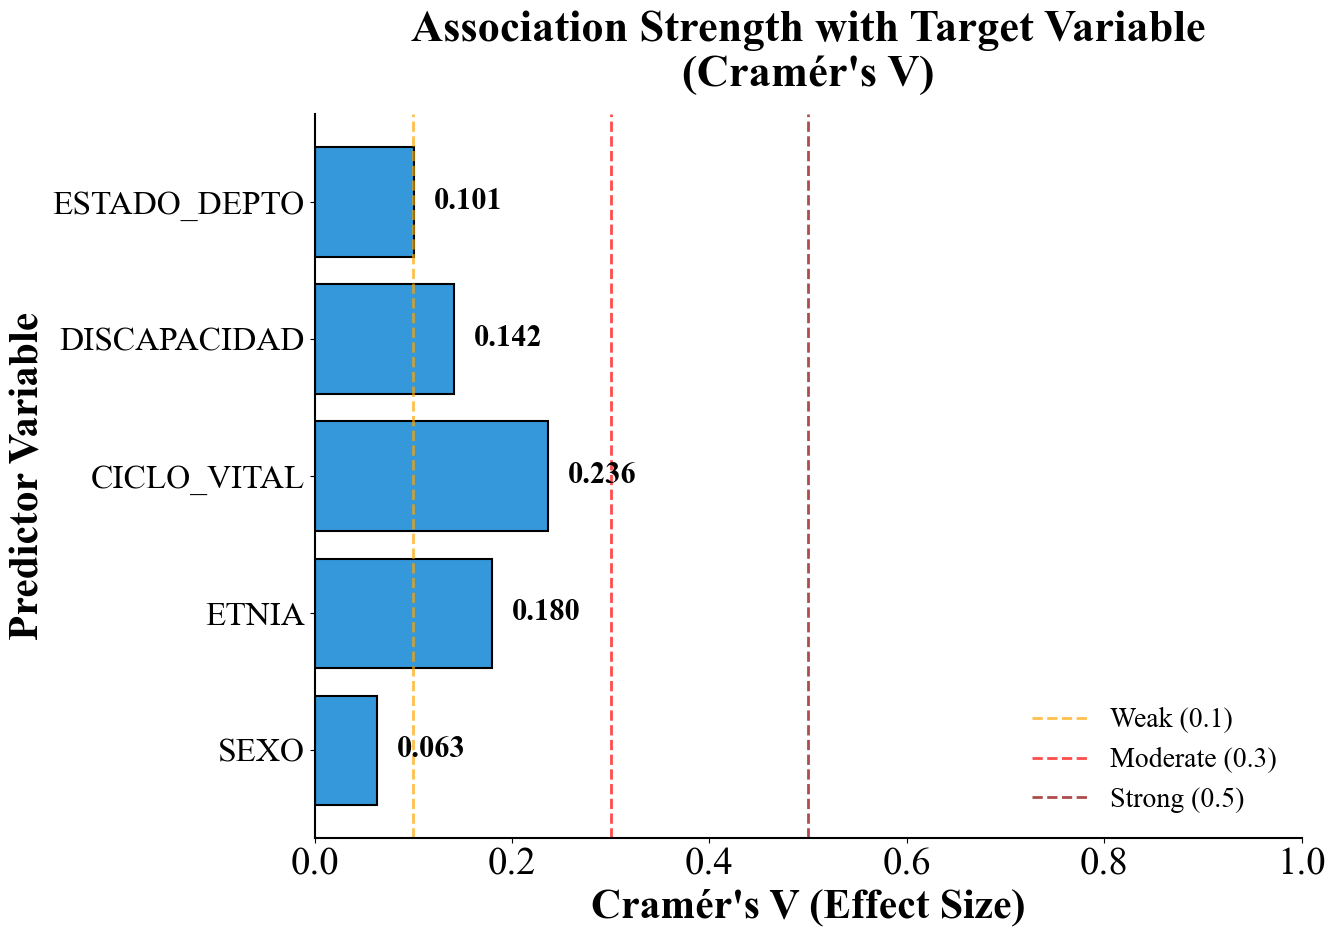


[2/2] Chi-square p-values...
Saved: 02_chi_square_pvalues.png


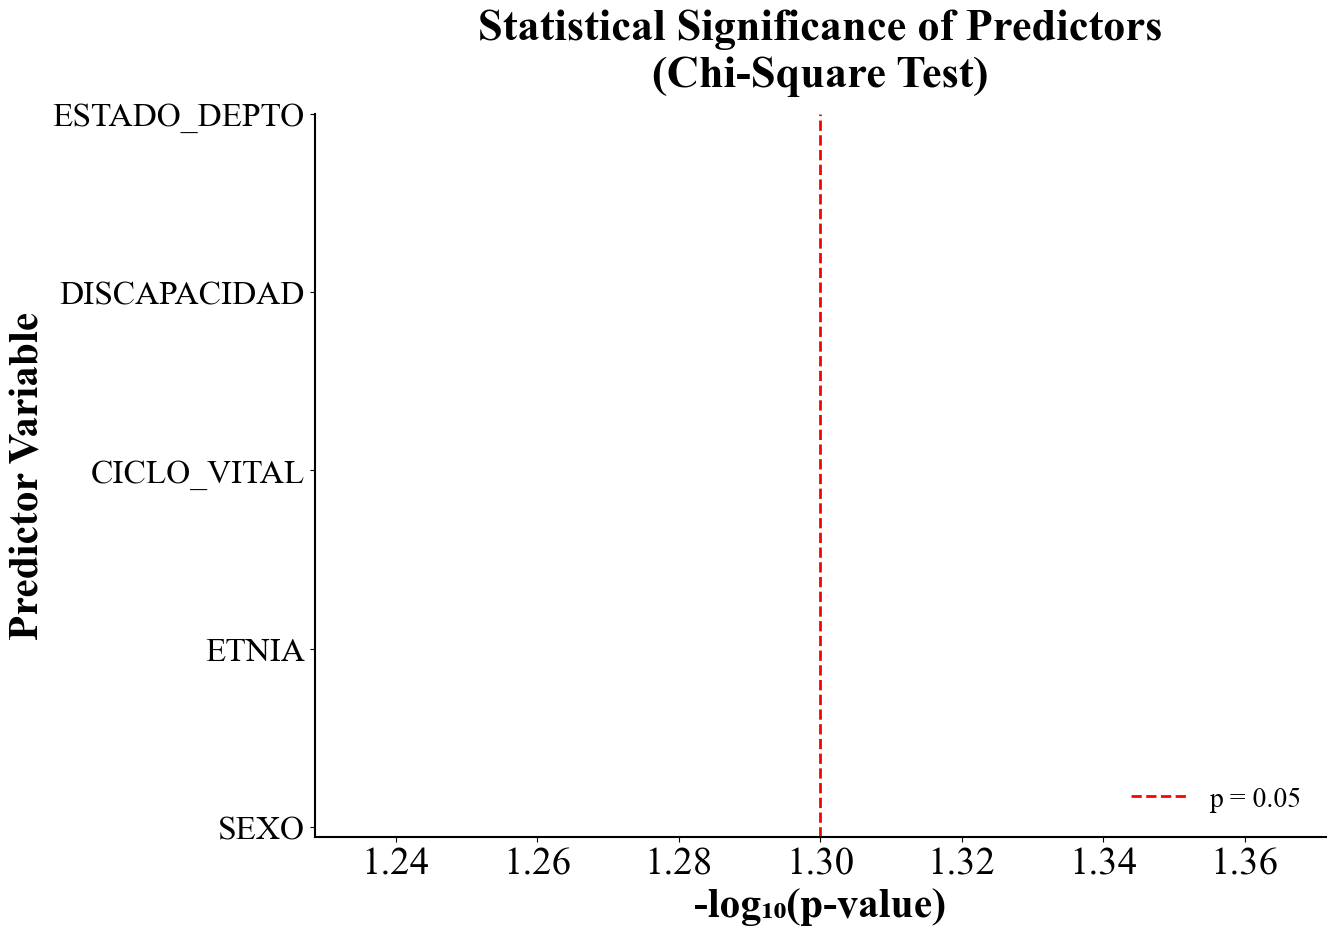

Saved: 02_predictors_associations.xlsx


In [67]:
predictors = ['SEXO', 'ETNIA', 'CICLO_VITAL', 'DISCAPACIDAD', 'ESTADO_DEPTO']

def cramers_v(confusion_matrix):
    """Calculate Cramér's V"""
    chi2 = stats.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    min_dim = min(confusion_matrix.shape) - 1
    return np.sqrt(chi2 / (n * min_dim)) if min_dim > 0 else 0

associations = []

for pred in predictors:
    # Contingency table
    ct = pd.crosstab(df_clean[pred], df_clean['Desplazamiento_forzado_binaria'])
    
    # Chi-square test
    chi2, p_value, dof, expected = chi2_contingency(ct)
    
    # Cramér's V
    cramers = cramers_v(ct)
    
    associations.append({
        'Predictor': pred.replace('_EN', ''),
        'Chi2_Statistic': chi2,
        'P_Value': p_value,
        'Degrees_of_Freedom': dof,
        'Cramers_V': cramers,
        'Significant': 'Yes' if p_value < 0.05 else 'No',
        'Effect_Size': 'Strong' if cramers > 0.5 else ('Moderate' if cramers > 0.3 else ('Weak' if cramers > 0.1 else 'Very Weak'))
    })

associations_df = pd.DataFrame(associations)

print("\n--- Statistical Associations with Target Variable ---")
print(associations_df.to_string(index=False))

# Visualization of Cramér's V
print("\n[1/2] Cramér's V effect sizes...")
fig, ax = plt.subplots(1, 1, figsize=(14, 10))

predictors_labels = [a['Predictor'] for a in associations]
cramers_values = [a['Cramers_V'] for a in associations]

bars = ax.barh(range(len(predictors_labels)), cramers_values,
               color=COLOR_PRIMARY, edgecolor='black', linewidth=1.5)

ax.set_yticks(range(len(predictors_labels)))
ax.set_yticklabels(predictors_labels, fontsize=24)
ax.set_xlabel("Cramér's V (Effect Size)", fontsize=FONT_SIZE_LABELS, fontweight='bold')
ax.set_ylabel('Predictor Variable', fontsize=FONT_SIZE_LABELS, fontweight='bold')
ax.set_title("Association Strength with Target Variable\n(Cramér's V)",
             fontsize=FONT_SIZE_TITLE, fontweight='bold', pad=20)
ax.set_xlim(0, 1)

# Reference lines
ax.axvline(x=0.1, color='orange', linestyle='--', linewidth=2, alpha=0.7, label='Weak (0.1)')
ax.axvline(x=0.3, color='red', linestyle='--', linewidth=2, alpha=0.7, label='Moderate (0.3)')
ax.axvline(x=0.5, color='darkred', linestyle='--', linewidth=2, alpha=0.7, label='Strong (0.5)')
ax.legend(fontsize=20, loc='lower right', frameon=False)

for i, (bar, val) in enumerate(zip(bars, cramers_values)):
    ax.text(val + 0.02, i, f'{val:.3f}', va='center', fontsize=22, fontweight='bold')

apply_apa_style(ax)
plt.tight_layout()
plt.savefig('fig/01_exploratory_analysis/predictors_analysis/01_cramers_v_associations.png',
            dpi=DPI_SETTING, bbox_inches='tight')
print("Saved: 01_cramers_v_associations.png")
plt.show()

# Chi-square p-values
print("\n[2/2] Chi-square p-values...")
fig, ax = plt.subplots(1, 1, figsize=(14, 10))

# Transform p-values to -log10 for better visualization
log_pvalues = [-np.log10(a['P_Value']) for a in associations]

bars = ax.barh(range(len(predictors_labels)), log_pvalues,
               color=COLOR_SECONDARY, edgecolor='black', linewidth=1.5)

ax.set_yticks(range(len(predictors_labels)))
ax.set_yticklabels(predictors_labels, fontsize=24)
ax.set_xlabel('-log₁₀(p-value)', fontsize=FONT_SIZE_LABELS, fontweight='bold')
ax.set_ylabel('Predictor Variable', fontsize=FONT_SIZE_LABELS, fontweight='bold')
ax.set_title('Statistical Significance of Predictors\n(Chi-Square Test)',
             fontsize=FONT_SIZE_TITLE, fontweight='bold', pad=20)

# Significance threshold (p=0.05 → -log10(0.05) ≈ 1.3)
ax.axvline(x=1.3, color='red', linestyle='--', linewidth=2, label='p = 0.05')
ax.legend(fontsize=20, loc='lower right', frameon=False)

for i, (bar, val) in enumerate(zip(bars, log_pvalues)):
    p_val = associations[i]['P_Value']
    if p_val < 0.001:
        text = 'p < 0.001'
    else:
        text = f'p = {p_val:.3f}'
    ax.text(val + max(log_pvalues)*0.02, i, text, va='center', fontsize=20, fontweight='bold')

apply_apa_style(ax)
plt.tight_layout()
plt.savefig('fig/01_exploratory_analysis/predictors_analysis/02_chi_square_pvalues.png',
            dpi=DPI_SETTING, bbox_inches='tight')
print("Saved: 02_chi_square_pvalues.png")
plt.show()

# Save associations report
associations_df.to_excel('db/01_reports/02_predictors_associations.xlsx', index=False, engine='openpyxl')
print("Saved: 02_predictors_associations.xlsx")


Although all the categorical variables analyzed (SEXO, ETNIA, CICLO_VITAL, DISCAPACIDAD y ESTADO_DEPTO) show a statistically significant association with the target variable, Cramér's V values show effect sizes ranging from very weak to weak, indicating that, individually, each predictor explains only a limited fraction of the variability in forced displacement. However, given that the set of predictors is small and each one provides complementary information, it is justified to keep all variables in thedels, as their combination can capture interactions and patterns that are not reflected in the univariate analyses.

So far, these are the variables available for the model.

In [68]:
columns_for_modeling = ['ESTADO_DEPTO',    
                        'VIGENCIA', 
                        'HECHO',                 
                        'SEXO',            
                        'ETNIA',           
                        'DISCAPACIDAD',    
                        'CICLO_VITAL',     
                        'PER_OCU', 
                        'PER_DECLA',           
                        'EVENTOS',
                        'Desplazamiento_forzado_binaria']

# 9. GEOGRAPHICAL VARIABLES

Geographic variables were incorporated in a simple but effective way to capture the spatial patterns associated with the Colombian armed conflict. These characteristics summarize how the relative position of each state (using state capitals) with respect to Bogotá serves as an indicator of state presence, strategic mobility corridors, and exposure to illicit economies.


### Geographic Variables

- **North–South Distance (km_norte_sur)**  
  Measures the geodesic distance between each state capital and Bogotá along the north–south axis.  
  **Computation:** Distance between Bogotá and the state using the same longitude. Negative values indicate locations south of Bogotá.

$$
d_{\text{NS}} = \text{sign}(\phi - \phi_{\text{BOG}})\,\cdot\, 
\text{geodesic}\big((\phi_{\text{BOG}}, \lambda_{\text{BOG}}),(\phi,\lambda_{\text{BOG}})\big)
$$

- **East–West Distance (km_este_oeste)**  
  Measures the geodesic distance between each departmental capital and Bogotá along the east–west axis.  
  **Computation:** Distance between Bogotá and the department using the same latitude. Negative values indicate locations west of Bogotá.

$$
d_{\text{EW}} = \text{sign}(\lambda - \lambda_{\text{BOG}})\,\cdot\, 
\text{geodesic}\big((\phi_{\text{BOG}}, \lambda_{\text{BOG}}),(\phi_{\text{BOG}},\lambda)\big)
$$


- **Total Distance (distancia_total)**  
  Captures overall geodesic distance from Bogotá, used as a proxy of “distance to the State” and institutional reach.  
  **Computation:** Geodesic distance between Bogotá and the departmental capital using full latitude–longitude coordinates.

$$
d_{\text{total}} = 
\text{geodesic}\big((\phi_{\text{BOG}}, \lambda_{\text{BOG}}),(\phi,\lambda)\big)
$$

In [69]:
from geopy.distance import geodesic
import geopandas as gpd
from shapely.geometry import Point, LineString

In [70]:
# Department → Capital mapping
DEPT_CAPITALS = {
    'Amazonas': 'Leticia', 'Antioquia': 'Medellín', 'Arauca': 'Arauca',
    'Atlantico': 'Barranquilla', 'Bolivar': 'Cartagena', 'Boyaca': 'Tunja',
    'Caldas': 'Manizales', 'Caqueta': 'Florencia', 'Casanare': 'Yopal',
    'Cauca': 'Popayán', 'Cesar': 'Valledupar', 'Choco': 'Quibdó',
    'Cordoba': 'Montería', 'Cundinamarca': 'Bogotá', 'Guainia': 'Inírida',
    'Guaviare': 'San José del Guaviare', 'Huila': 'Neiva', 'La Guajira': 'Riohacha',
    'Magdalena': 'Santa Marta', 'Meta': 'Villavicencio', 'Nariño': 'Pasto',
    'Norte De Santander': 'Cúcuta', 'Putumayo': 'Mocoa', 'Quindio': 'Armenia',
    'Risaralda': 'Pereira', 'Archipielago de San Andrés, Providencia y Santa Catalina': 'San Andrés',
    'Santander': 'Bucaramanga', 'Sucre': 'Sincelejo', 'Tolima': 'Ibagué',
    'Valle del Cauca': 'Cali', 'Vaupes': 'Mitú', 'Vichada': 'Puerto Carreño',
    'Bogota, D.C.': 'Bogotá'
}

Verified coordinates of the urban center of each capital city (central squares, main parks, or administrative centers)

In [71]:
URBAN_CENTER_COORDS = {
    'Amazonas': (-4.2153, -69.9406),
    'Antioquia': (6.2476, -75.5658),
    'Arauca': (7.0902, -70.7590),
    'Atlantico': (10.9639, -74.7964),
    'Bolivar': (10.4236, -75.5353),
    'Boyaca': (5.5353, -73.3678),
    'Caldas': (5.0703, -75.5138),
    'Caqueta': (1.6144, -75.6062),
    'Casanare': (5.3378, -72.3959),
    'Cauca': (2.4419, -76.6063),
    'Cesar': (10.4636, -73.2506),
    'Choco': (5.6947, -76.6611),
    'Cordoba': (8.7479, -75.8814),
    'Cundinamarca': (4.5981, -74.0758),
    'Guainia': (3.8653, -67.9239),
    'Guaviare': (2.5697, -72.6459),
    'Huila': (2.9273, -75.2819),
    'La Guajira': (11.5444, -72.9072),
    'Magdalena': (11.2408, -74.2099),
    'Meta': (4.1420, -73.6266),
    'Nariño': (1.2136, -77.2811),
    'Norte De Santander': (7.8939, -72.5078),
    'Putumayo': (1.1469, -76.6411),
    'Quindio': (4.5339, -75.6811),
    'Risaralda': (4.8133, -75.6961),
    'Archipielago de San Andrés, Providencia y Santa Catalina': (12.5847, -81.7006),
    'Santander': (7.1254, -73.1198),
    'Sucre': (9.3047, -75.3978),
    'Tolima': (4.4389, -75.2322),
    'Valle del Cauca': (3.4372, -76.5225),
    'Vaupes': (1.2537, -70.2369),
    'Vichada': (6.1894, -67.4936),
    'Bogota, D.C.': (4.5981, -74.0758)
}

coords_cache = URBAN_CENTER_COORDS

for dept, coords in coords_cache.items():
    capital = DEPT_CAPITALS[dept]
    print(f"✓ {dept:35s} ({capital:25s}): {coords[0]:8.4f}, {coords[1]:9.4f}")

# Reference coordinates: BOGOTÁ
BOGOTA_COORDS = coords_cache['Bogota, D.C.']

✓ Amazonas                            (Leticia                  ):  -4.2153,  -69.9406
✓ Antioquia                           (Medellín                 ):   6.2476,  -75.5658
✓ Arauca                              (Arauca                   ):   7.0902,  -70.7590
✓ Atlantico                           (Barranquilla             ):  10.9639,  -74.7964
✓ Bolivar                             (Cartagena                ):  10.4236,  -75.5353
✓ Boyaca                              (Tunja                    ):   5.5353,  -73.3678
✓ Caldas                              (Manizales                ):   5.0703,  -75.5138
✓ Caqueta                             (Florencia                ):   1.6144,  -75.6062
✓ Casanare                            (Yopal                    ):   5.3378,  -72.3959
✓ Cauca                               (Popayán                  ):   2.4419,  -76.6063
✓ Cesar                               (Valledupar               ):  10.4636,  -73.2506
✓ Choco                               (Quib

In [72]:
# Calculation of distances for states present in df_clean
geo_features = []

for dept in df_clean['ESTADO_DEPTO'].unique():
    coords = coords_cache.get(dept)

    if coords:
        lat, lon = coords

        km_norte_sur = geodesic(BOGOTA_COORDS, (lat, BOGOTA_COORDS[1])).km
        if lat < BOGOTA_COORDS[0]:
            km_norte_sur = -km_norte_sur

        km_este_oeste = geodesic(BOGOTA_COORDS, (BOGOTA_COORDS[0], lon)).km
        if lon < BOGOTA_COORDS[1]:
            km_este_oeste = -km_este_oeste

        distancia_total = geodesic(BOGOTA_COORDS, coords).km

    else:
        km_norte_sur = km_este_oeste = distancia_total = 0

    geo_features.append({
        'ESTADO_DEPTO': dept,
        'Capital': DEPT_CAPITALS[dept],
        'Latitud': lat,
        'Longitud': lon,
        'km_norte_sur': km_norte_sur,
        'km_este_oeste': km_este_oeste,
        'distancia_total': distancia_total
    })

    
# Convert to DataFrame and join with df_clean
geo_df = pd.DataFrame(geo_features)

# Save geo_df as CSV
geo_df.to_csv("geo_df.csv", index=False, encoding="utf-8")

df_clean = df_clean.merge(geo_df, on='ESTADO_DEPTO', how='left')

In [73]:
print("\n✓ Geographic features added using verified coordinates:")
print(f"  • km_norte_sur:   {df_clean['km_norte_sur'].min():.1f} to {df_clean['km_norte_sur'].max():.1f}")
print(f"  • km_este_oeste:  {df_clean['km_este_oeste'].min():.1f} to {df_clean['km_este_oeste'].max():.1f}")
print(f"  • distancia_total:{df_clean['distancia_total'].min():.1f} to {df_clean['distancia_total'].max():.1f}")


✓ Geographic features added using verified coordinates:
  • km_norte_sur:   -974.6 to 883.3
  • km_este_oeste:  -846.1 to 730.4
  • distancia_total:0.0 to 1218.0


In [74]:
colombia_gdf = None

# Múltiples fuentes
urls = [
    "https://geodata.ucdavis.edu/gadm/gadm4.1/json/gadm41_COL_1.json",
    "https://raw.githubusercontent.com/john-guerra/covid19_colombia/master/data/colombia.geo.json",
    "https://gist.githubusercontent.com/john-guerra/43c7656821069d00dcbc/raw/colombia.geo.json"
]

for idx, url in enumerate(urls, 1):
    try:
        print(f"[{idx}/{len(urls)}] Intentando: {url[:60]}...")
        colombia_gdf = gpd.read_file(url)
        print(f"✓ Shapefile descargado exitosamente")
        print(f"  • {len(colombia_gdf)} regiones encontradas\n")
        break
    except Exception as e:
        print(f"✗ Error: {str(e)[:80]}\n")
        continue

if colombia_gdf is None:
    print("⚠ WARNING: No se pudo descargar el shapefile.")
    print("  Se dibujará el mapa solo con puntos.\n")

[1/3] Intentando: https://geodata.ucdavis.edu/gadm/gadm4.1/json/gadm41_COL_1.j...
✓ Shapefile descargado exitosamente
  • 33 regiones encontradas



✓ Base map drawn with colors
✓ Cardinal axes drawn (centered on Bogotá)
✓ Drawing distance lines...
✓ Drawing capital cities...
✓ Adding labels...


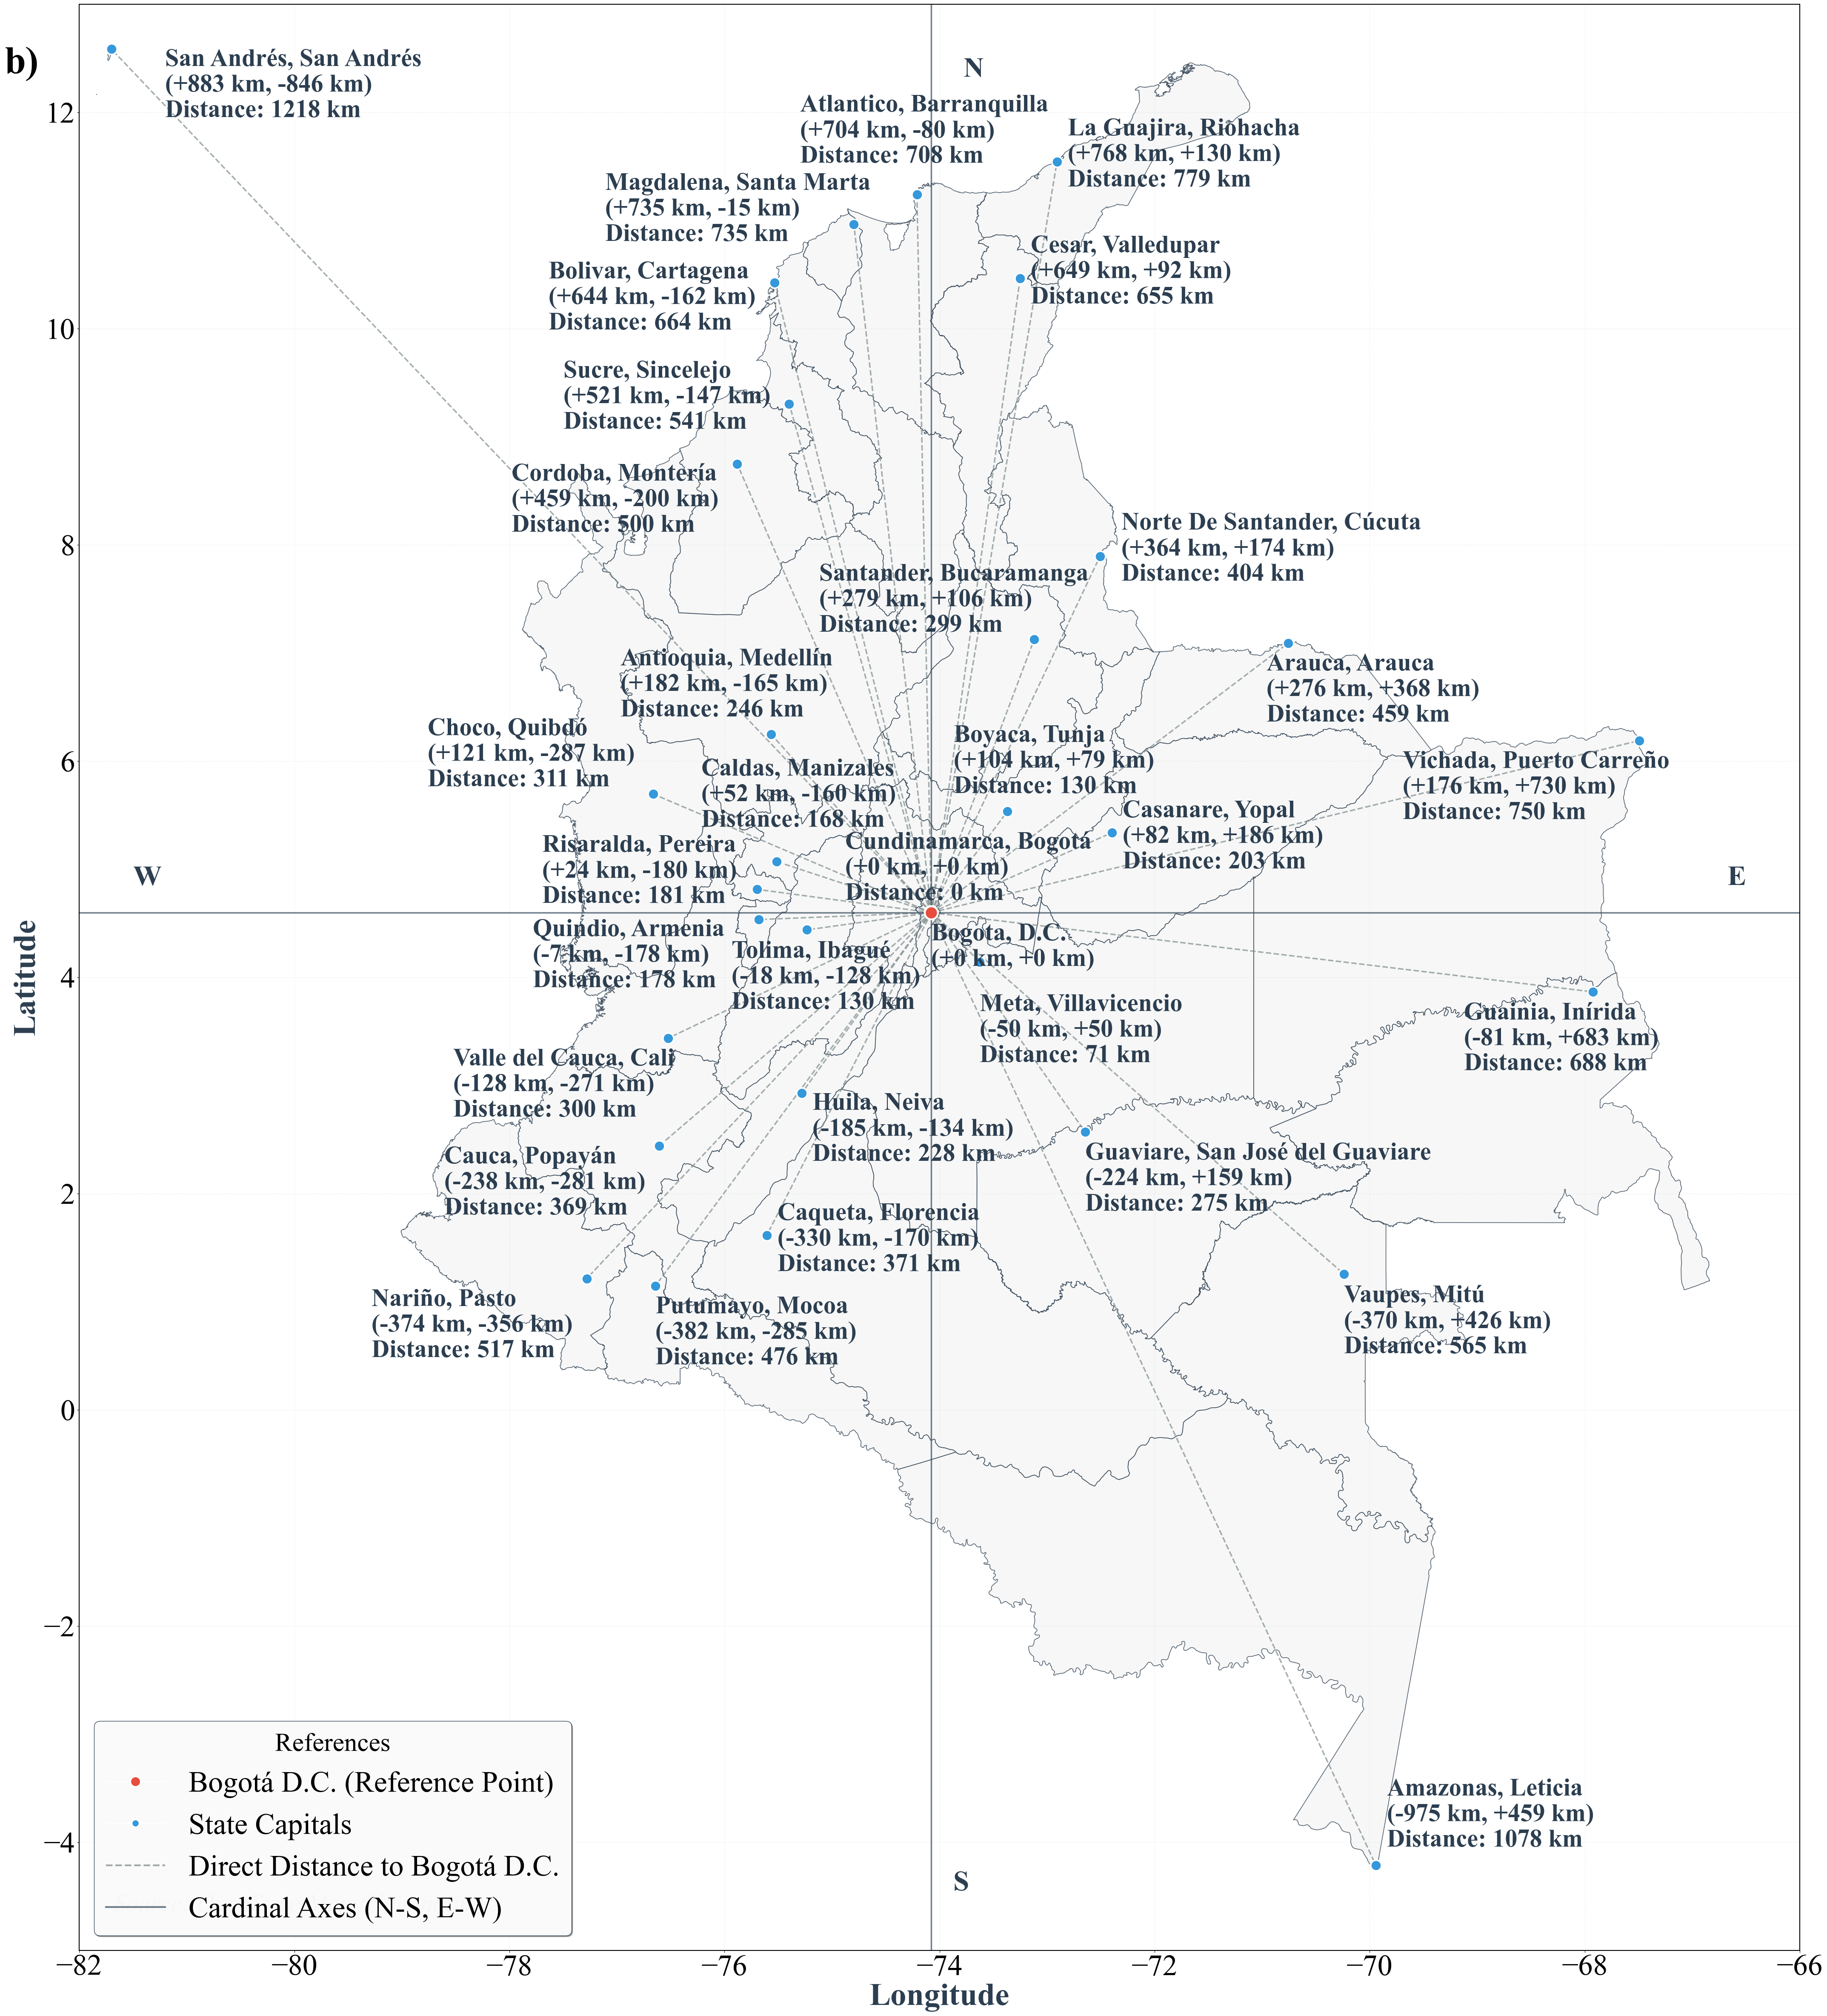

In [75]:
# SIZE AND STYLE SETTINGS
FONT_SIZE_LABELS = 42
FONT_SIZE_TICKS = 42
FONT_SIZE_TITLE = 42
FONT_SIZE_ANNOTATIONS = 42
FONT_SIZE_LEGEND = 42
DPI_SETTING = 100

# CUSTOM LABEL POSITIONS
LABEL_POSITIONS = {
    'Amazonas': (0.1, 0.8),
    'Antioquia': (-1.4, 0.8),
    'Arauca': (-0.2, -0.1),
    'Atlantico': (-0.5, 1.2),
    'Bolivar': (-2.1, 0.2),
    'Boyaca': (-0.5, 0.8),
    'Caldas': (-0.7, 0.95),
    'Caqueta': (0.1, 0.3),
    'Casanare': (0.1, 0.3),
    'Cauca': (-2, 0),
    'Cesar': (0.1, 0.4),
    'Choco': (-2.1, 0.7),
    'Cordoba': (-2.1, 0),
    'Cundinamarca': (-0.8, 0.75),
    'Guainia': (-1.2, -0.1),
    'Guaviare': (0, -0.1),
    'Huila': (0.1, 0),
    'La Guajira': (0.1, 0.4),
    'Magdalena': (-2.9, 0.2),
    'Meta': (0, -0.3),
    'Nariño': (-2, -0.1),
    'Norte De Santander': (0.2, 0.4),
    'Putumayo': (0, -0.1),
    'Quindio': (-2.1, 0),
    'Risaralda': (-2, 0.5),
    'San Andrés': (0.5, -1e-6),
    'Santander': (-2, 0.7),
    'Sucre': (-2.1, 0.4),
    'Tolima': (-0.7, -0.1),
    'Valle del Cauca': (-2, -0.1),
    'Vaupes': (0, -0.1),
    'Vichada': (-2.2, -0.1),
    'Bogota, D.C.': (0, -0.1)
}


DEPARTMENT_COLORS = {
    'Amazonas': '#F5F5F5',
    'Antioquia': '#F5F5F5',
    'Arauca': '#F5F5F5',
    'Atlantico': '#F5F5F5',
    'Bolivar': '#F5F5F5',
    'Boyaca': '#F5F5F5',
    'Caldas': '#F5F5F5',
    'Caqueta': '#F5F5F5',
    'Casanare': '#F5F5F5',
    'Cauca': '#F5F5F5',
    'Cesar': '#F5F5F5',
    'Choco': '#F5F5F5',
    'Cordoba': '#F5F5F5',
    'Cundinamarca': '#F5F5F5',
    'Guainia': '#F5F5F5',
    'Guaviare': '#F5F5F5',
    'Huila': '#F5F5F5',
    'La Guajira': '#F5F5F5',
    'Magdalena': '#F5F5F5',
    'Meta': '#F5F5F5',
    'Nariño': '#F5F5F5',
    'Norte De Santander': '#F5F5F5',
    'Putumayo': '#F5F5F5',
    'Quindio': '#F5F5F5',
    'Risaralda': '#F5F5F5',
    'San Andrés': '#F5F5F5',
    'Santander': '#F5F5F5',
    'Sucre': '#F5F5F5',
    'Tolima': '#F5F5F5',
    'Valle del Cauca': '#F5F5F5',
    'Vaupes': '#F5F5F5',
    'Vichada': '#F5F5F5',
    'Bogota, D.C.': '#F5F5F5',
}

# Configuración de figura
fig, ax = plt.subplots(figsize=(44, 48))
ax.set_aspect('equal')

# ========================================
# DIBUJAR MAPA BASE CON COLORES
# ========================================
if colombia_gdf is not None:
    # Intentar mapear colores a departamentos del shapefile
    if 'NAME_1' in colombia_gdf.columns:
        dept_col = 'NAME_1'
    elif 'NOMBRE_DPT' in colombia_gdf.columns:
        dept_col = 'NOMBRE_DPT'
    elif 'name' in colombia_gdf.columns:
        dept_col = 'name'
    else:
        dept_col = None
    
    if dept_col:
        # Crear columna de color
        colombia_gdf['color'] = colombia_gdf[dept_col].map(
            lambda x: DEPARTMENT_COLORS.get(x, '#F5F5F5')
        )
        # Dibujar con colores
        colombia_gdf.plot(ax=ax, 
                          color=colombia_gdf['color'], 
                          edgecolor='#2C3E50', 
                          linewidth=1.2,
                          alpha=0.8)
    else:
        # Dibujar sin colores específicos
        colombia_gdf.plot(ax=ax, 
                          color='#F5F5F5', 
                          edgecolor='#2C3E50', 
                          linewidth=1.2,
                          alpha=0.8)
    print("✓ Base map drawn with colors")
else:
    ax.set_xlim(-82, -66)
    ax.set_ylim(-5, 13)
    print("✓ Limits set (no shapefile)")

# ========================================
# DIBUJAR EJES NORTE-SUR Y ESTE-OESTE
# ========================================
# Eje Norte-Sur (vertical) pasando por Bogotá
ax.axvline(x=BOGOTA_COORDS[1], color='#34495E', linewidth=2.5, linestyle='-', alpha=0.7, zorder=2)

# Eje Este-Oeste (horizontal) pasando por Bogotá
ax.axhline(y=BOGOTA_COORDS[0], color='#34495E', linewidth=2.5, linestyle='-', alpha=0.7, zorder=2)

# Etiquetas de ejes cardinales
ax.text(BOGOTA_COORDS[1] + 0.3, 12.5, 'N', 
        fontsize=FONT_SIZE_ANNOTATIONS + 6, fontweight='bold', 
        ha='left', va='top', color='#2C3E50')

ax.text(BOGOTA_COORDS[1] + 0.2, -4.5, 'S', 
        fontsize=FONT_SIZE_ANNOTATIONS + 6, fontweight='bold', 
        ha='left', va='bottom', color='#2C3E50')

ax.text(-81.5, BOGOTA_COORDS[0] + 0.2, 'W', 
        fontsize=FONT_SIZE_ANNOTATIONS + 6, fontweight='bold', 
        ha='left', va='bottom', color='#2C3E50')

ax.text(-66.5, BOGOTA_COORDS[0] + 0.2, 'E', 
        fontsize=FONT_SIZE_ANNOTATIONS + 6, fontweight='bold', 
        ha='right', va='bottom', color='#2C3E50')

print("✓ Cardinal axes drawn (centered on Bogotá)")

# ========================================
# DIBUJAR LÍNEAS A BOGOTÁ (MÁS ANCHAS Y OSCURAS)
# ========================================
print("✓ Drawing distance lines...")
for idx, row in geo_df.iterrows():
    if row['ESTADO_DEPTO'] != 'Bogota, D.C.' and row['distancia_total'] > 0:
        ax.plot([BOGOTA_COORDS[1], row['Longitud']], 
                [BOGOTA_COORDS[0], row['Latitud']],
                color='#7F8C8D',  # Más oscuro
                linewidth=2.5,     # Más ancho
                linestyle='--',
                alpha=0.7,         # Más visible
                zorder=1)

# ========================================
# DIBUJAR PUNTOS DE CAPITALES
# ========================================
print("✓ Drawing capital cities...")
for idx, row in geo_df.iterrows():
    if row['Latitud'] != 0 and row['Longitud'] != 0:
        if row['ESTADO_DEPTO'] == 'Bogota, D.C.':
            # Bogotá en rojo
            ax.plot(row['Longitud'], row['Latitud'], 'o', 
                    color='#E74C3C', 
                    markersize=22, 
                    markeredgecolor='white',
                    markeredgewidth=3,
                    zorder=5)
        else:
            # Otras capitales en azul
            ax.plot(row['Longitud'], row['Latitud'], 'o', 
                    color='#3498DB', 
                    markersize=18, 
                    markeredgecolor='white',
                    markeredgewidth=2.5,
                    zorder=4)

# ========================================
# AGREGAR ETIQUETAS PERSONALIZADAS (SIN FONDO)
# ========================================
print("✓ Adding labels...")
for idx, row in geo_df.iterrows():
    if row['Latitud'] != 0 and row['Longitud'] != 0:
        # Nombre corto PRIMERO
        dept_name = row['ESTADO_DEPTO']
        if 'Archip' in dept_name:
            dept_name = 'San Andrés'
        
        # Construir etiqueta en inglés
        # ⚠️ MODIFICACIÓN: Bogotá sin nombre de capital
        if row['ESTADO_DEPTO'] == 'Bogota, D.C.':
            label = f"{dept_name}\n"  # Solo "Bogota, D.C." sin "Bogotá"
        else:
            label = f"{dept_name}, {row['Capital']}\n"  # Resto normal
        
        label += f"({row['km_norte_sur']:+.0f} km, {row['km_este_oeste']:+.0f} km)"
        
        if row['ESTADO_DEPTO'] != 'Bogota, D.C.':
            label += f"\nDistance: {row['distancia_total']:.0f} km"
        
        # ⚠️ CORRECCIÓN CRÍTICA: Usar dept_name (nombre corto) en lugar de row['Departamento']
        offset_x, offset_y = LABEL_POSITIONS.get(
            dept_name,  # <-- CAMBIADO DE row['Departamento'] A dept_name
            (0.5, 0.3)  # Valor por defecto
        )
        
        fontsize = FONT_SIZE_LABELS if row['ESTADO_DEPTO'] != 'Bogota, D.C.' else FONT_SIZE_LABELS
        fontweight = 'bold'
        
        # Texto SIN fondo ni recuadro
        ax.text(row['Longitud'] + offset_x, 
                row['Latitud'] + offset_y,
                label,
                fontsize=fontsize,
                fontweight=fontweight,
                ha='left', # if offset_x > 0 else 'right',
                va='top', # if offset_y > 0 else 'top',
                color='#2C3E50',
                zorder=6)

# ========================================
# CONFIGURACIÓN DE EJES Y TÍTULO
# ========================================
ax.set_xlabel('Longitude', fontsize=FONT_SIZE_TICKS + 12, fontweight='bold', color='#2C3E50')
ax.set_ylabel('Latitude', fontsize=FONT_SIZE_TICKS + 12, fontweight='bold', color='#2C3E50')
# ax.set_title('COLOMBIA MAP\nDepartmental Capitals and Distances to Bogotá D.C.', 
#              fontsize=FONT_SIZE_TITLE, 
#              fontweight='bold',
#              color='#2C3E50',
#              pad=35)

# Tamaño de números en ejes
ax.tick_params(axis='both', labelsize=FONT_SIZE_TICKS + 8)

# ========================================
# LEYENDA
# ========================================
from matplotlib.lines import Line2D
legend_elements = [
    Line2D([0], [0], marker='o', color='w', 
           markerfacecolor='#E74C3C', markersize=18,
           markeredgecolor='white', markeredgewidth=3,
           label='Bogotá D.C. (Reference Point)'),
    Line2D([0], [0], marker='o', color='w', 
           markerfacecolor='#3498DB', markersize=13,
           markeredgecolor='white', markeredgewidth=2.5,
           label='State Capitals'),
    Line2D([0], [0], color='#7F8C8D', linewidth=3, 
           linestyle='--', alpha=0.7, 
           label='Direct Distance to Bogotá D.C.'),
    Line2D([0], [0], color='#34495E', linewidth=3, 
           linestyle='-', alpha=0.7, 
           label='Cardinal Axes (N-S, E-W)')
]
ax.legend(handles=legend_elements, 
         loc='lower left',
         fontsize=FONT_SIZE_LEGEND + 8,
         framealpha=0.95,
         edgecolor='#2C3E50',
         shadow=True,
         title='References',
         title_fontsize=FONT_SIZE_LEGEND + 2)

# ========================================
# GRID
# ========================================
ax.grid(True, linestyle=':', alpha=0.3, color='#95A5A6', linewidth=0.8)

# ========================================
# AJUSTAR LÍMITES
# ========================================
ax.set_xlim(-82, -66)
ax.set_ylim(-5, 13)

# ========================================
# ANOTACIÓN DE FUENTE
# ========================================
ax.text(0.02, 0.02, 
        'Source: OpenStreetMap (Nominatim)', 
        transform=ax.transAxes,
        fontsize=FONT_SIZE_ANNOTATIONS,
        color='#7F8C8D',
        style='italic')

fig.text(0.01, 0.97, 'b)', fontsize=65, fontweight='bold', ha='left', va='top')

plt.tight_layout()

# ========================================
# GUARDAR CON DPI PERSONALIZADO
# ========================================
output_file = 'fig/01_exploratory_analysis/before_cleaning/09_colombia_map_capitals_distances.png'
# plt.savefig(output_file, dpi=DPI_SETTING, bbox_inches='tight', facecolor='white', edgecolor='none')
plt.savefig(output_file, dpi=DPI_SETTING, bbox_inches='tight')

plt.show()

# 10. CORRELATION MATRIX

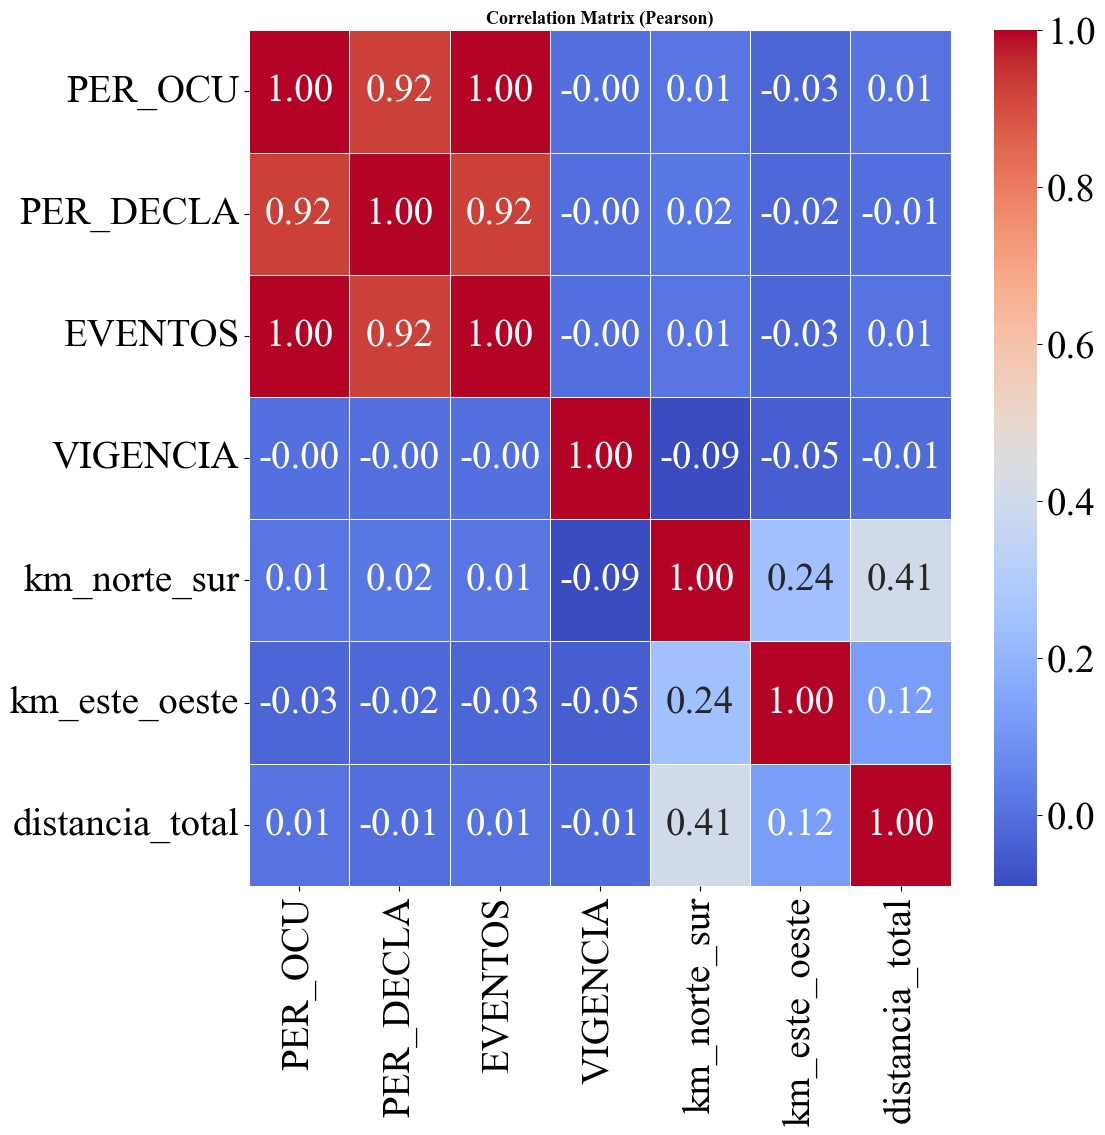

In [76]:
vars_numericas = ['PER_OCU', 'PER_DECLA', 'EVENTOS', 'VIGENCIA','km_norte_sur', 'km_este_oeste', 'distancia_total']

# Calculate the correlation matrix
corr_matrix = df_clean[vars_numericas].corr(method='pearson')

# Correlation visualization
plt.figure(figsize=(12, 12))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix (Pearson)', fontsize=13, fontweight='bold')
plt.tight_layout()
plt.savefig('fig/01_exploratory_analysis/predictors_analysis/03_correlation_matrix.png',
            dpi=DPI_SETTING, bbox_inches='tight')
plt.show()

Due to the high correlation between ‘PER_OCU’, ‘PER_DECLA’, and ‘EVENTOS’, only ‘EVENTOS’ is included for model training. The others are retained.

# 11. FINAL DATASET

In [77]:
columns_for_modeling = ['ESTADO_DEPTO',    
                        'VIGENCIA', 
                        'HECHO',                 
                        'SEXO',            
                        'ETNIA',           
                        'DISCAPACIDAD',    
                        'CICLO_VITAL',           
                        'EVENTOS',
                        'Desplazamiento_forzado_binaria',
                        'km_norte_sur', 
                        'km_este_oeste', 
                        'distancia_total']

# Crear df_final con solo esas columnas
df_final = df_clean[columns_for_modeling].copy()

In [78]:
output_file = 'db/01_cleaned_data/displacement_vs_others_final.csv'
df_final.to_csv(output_file, index=False)

In [79]:
# Save only geographic columns (same row order as main dataset)
df_final[['km_norte_sur', 'km_este_oeste', 'distancia_total']].to_csv(
    'db/01_cleaned_data/geographic_features_all_rows.csv', index=False
)

In [80]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5696308 entries, 0 to 5696307
Data columns (total 12 columns):
 #   Column                          Dtype  
---  ------                          -----  
 0   ESTADO_DEPTO                    object 
 1   VIGENCIA                        float64
 2   HECHO                           object 
 3   SEXO                            object 
 4   ETNIA                           object 
 5   DISCAPACIDAD                    object 
 6   CICLO_VITAL                     object 
 7   EVENTOS                         float64
 8   Desplazamiento_forzado_binaria  int64  
 9   km_norte_sur                    float64
 10  km_este_oeste                   float64
 11  distancia_total                 float64
dtypes: float64(5), int64(1), object(6)
memory usage: 521.5+ MB
